In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import math
import researchpy as rp
import scipy.stats as st
from functools import reduce
import os




Bad key "text.kerning_factor" on line 4 in
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Preprocessing Data

Read the csv files and estimates the metrics.
EventosManabi.csv is a dataset where you can find the historical records during eathquake.

In [225]:
# Here I load the first file and form a datetime column
eventos= pd.read_csv('C:/Users/User/Downloads/EventosManabi.csv')
eventos['FechaEventoConv']=pd.to_datetime( pd.Series(pd.to_datetime(eventos["FechaEvento"].astype(str)+' '+
                                                                    eventos["Hora"].astype(str)+':00') ) )
eventos= eventos.set_index('FechaEventoConv')

eventos = eventos.loc[eventos.CantonEvento != 'MANGA DEL CURA']

In [226]:
eventos.head(5)

,ID,FechaEvento,Hora,BaseCliente,ProvinciaCliente,CantonCliente,CiudadCliente,ParroquiaCliente,LatitudCliente,LongitudCliente,BaseEvento,NombreSitioEvento,ProvinciaEvento,CantonEvento,CiudadEvento,ParroquiaEvento,LatitudEvento,LongitudEvento,CantidadClientes
FechaEventoConv,,,,,,,,,,,,,,,,,,,
2016-04-16 17:00:00,1,2016-04-16,17,50913,MANABI,PORTOVIEJO,PORTOVIEJO,PORTOVIEJO,-1.037670,-80.4680,52064,CDLA_AURORA,MANABI,MANTA,MANTA,MANTA,-0.981686,-80.7053,1
2016-07-16 14:00:00,2,2016-07-16,14,40574,LOS RIOS,QUEVEDO,QUEVEDO,QUEVEDO,-1.021810,-79.4676,16144,VIA_SAN_MATEO,MANABI,MANTA,MANTA,MANTA,-0.957225,-80.7808,1
2016-07-17 15:00:00,3,2016-07-17,15,11308,PICHINCHA,QUITO,QUITO,CONOCOTO,-0.289892,-78.4771,51091,ERD_48_PORTOVIEJO_SUR_OESTE,MANABI,PORTOVIEJO,PORTOVIEJO,PORTOVIEJO,-1.076860,-80.4544,1
2016-04-16 17:00:00,4,2016-04-16,17,52995,MANABI,PORTOVIEJO,PORTOVIEJO,PORTOVIEJO,-1.047240,-80.4718,48262,CDLA_COMERCIO_PORTOVIEJO,MANABI,PORTOVIEJO,PORTOVIEJO,PORTOVIEJO,-1.054810,-80.4667,1
2016-07-15 05:00:00,5,2016-07-15,5,40018,AZUAY,CUENCA,CUENCA,CUENCA,-2.893350,-79.0022,18753,BAHIA_CENTRO,MANABI,SUCRE,BAHIA DE CARAQUEZ,BAHIA DE CARAQUEZ,-0.605561,-80.4261,1


In [227]:
# Number of Active Users
df_clientes= pd.DataFrame(eventos['CantidadClientes'].resample('H').sum())

# Number of number of active communication towers
df_torres= pd.DataFrame(eventos['CantidadClientes'].resample('H').count())


Here, I show a general analysis using records behavior and communication towers. I separated the graph into 2 parts: During the earthquake and after this. Records behavior is based in user records and communication towers in the active towers.
April 15 to 18 corresponds to the period during the earthquake, while July 15 to 17 belong earthquake later period.


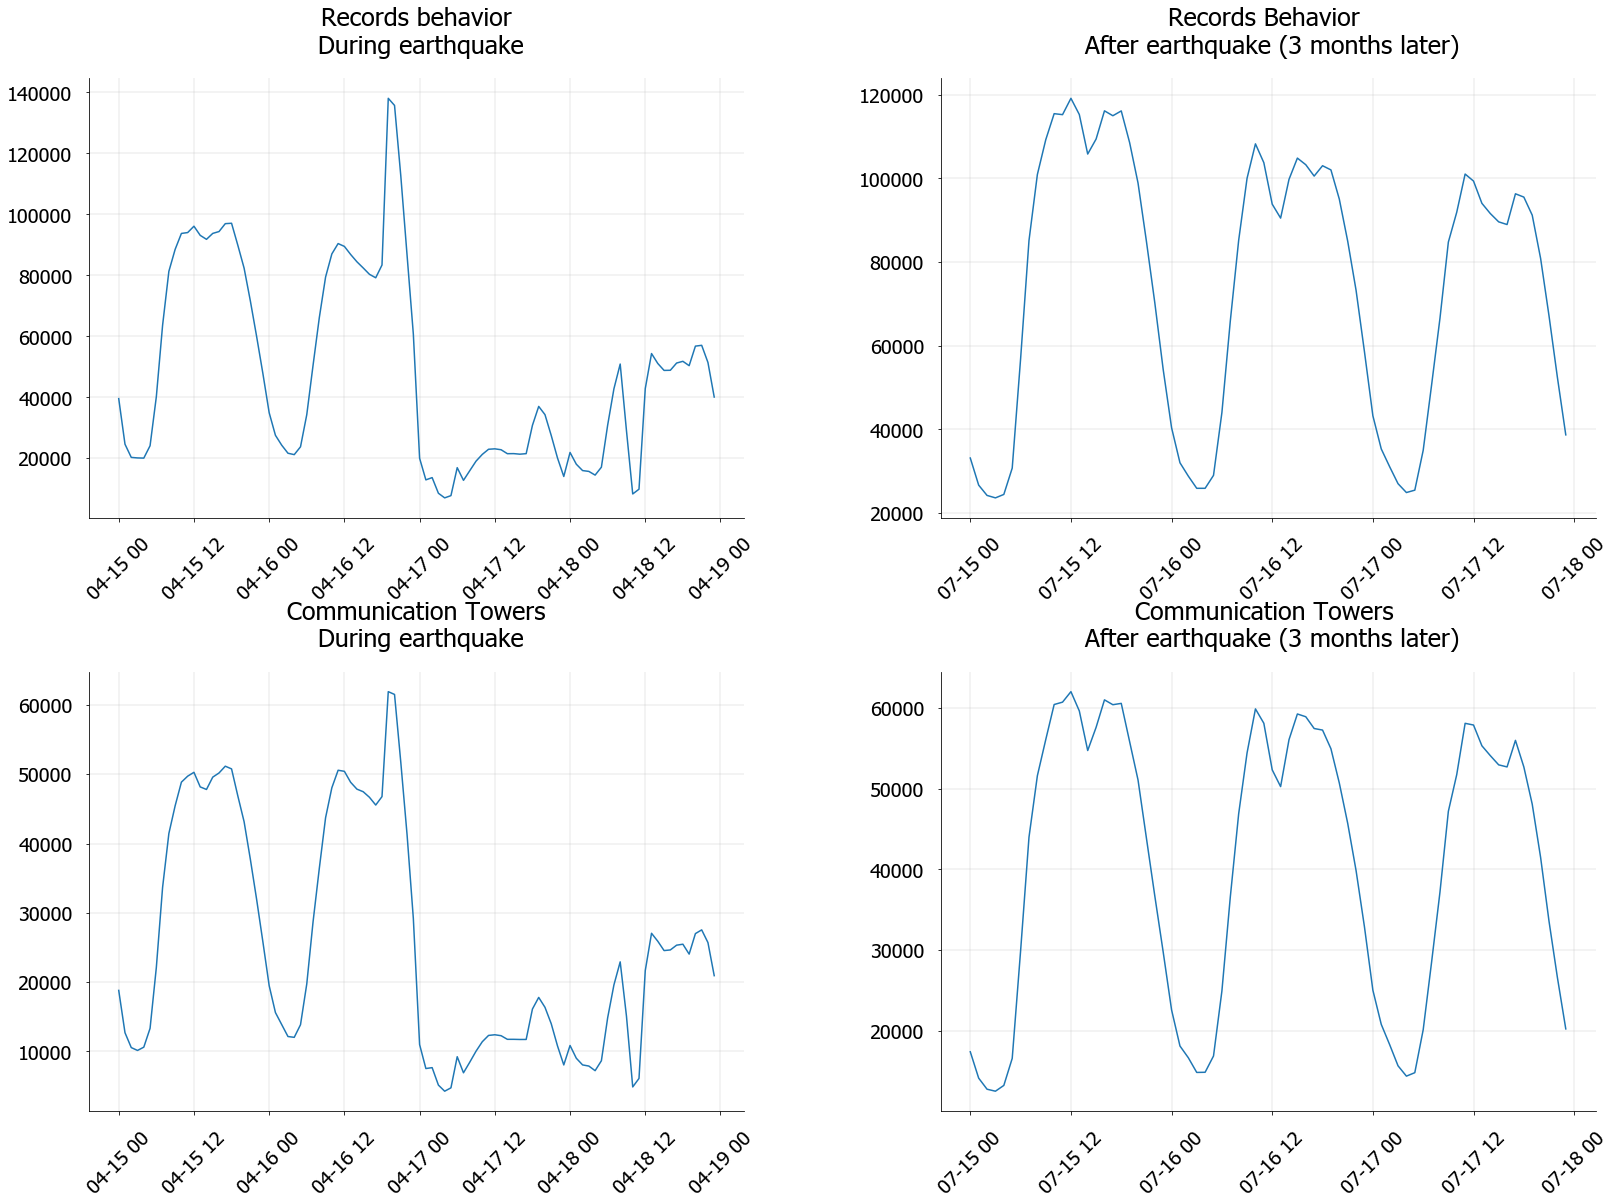

In [228]:
plt.rcParams ['font.family'] = 'Tahoma'
fig, ((ax1, ax2), (ax3, ax4))=  plt.subplots(2, 2, sharex=False, sharey= False, figsize=(27,19),gridspec_kw=dict( wspace=0.3,hspace=0.35)) 

spine= [ax1, ax2, ax3, ax4]
for spi in spine:
    spi.spines["top"].set_visible(False)
    spi.spines["right"].set_visible(False)
    
ax1.plot(df_clientes.reset_index()[df_clientes.reset_index().FechaEventoConv < '2016-04-19'].set_index('FechaEventoConv'))
ax1.tick_params(axis='both', which='major', pad=13,labelsize=20)
ax1.tick_params(axis= 'x', rotation=45)
ax1.grid(linewidth=0.3)
ax1.set_title("Records behavior\n During earthquake",size=25)

ax2.plot(df_clientes.reset_index()[df_clientes.reset_index().FechaEventoConv >= '2016-07-15'].set_index('FechaEventoConv'))
ax2.tick_params(axis='both', which='major', pad=13,labelsize=20)
ax2.tick_params(axis= 'x', rotation=45)
ax2.grid(linewidth=0.3)
ax2.set_title("Records Behavior \n After earthquake (3 months later)",size=25)

ax3.plot(df_torres.reset_index()[df_torres.reset_index().FechaEventoConv < '2016-04-19'].set_index('FechaEventoConv'))
ax3.tick_params(axis='both', which='major', pad=13,labelsize=20)
ax3.tick_params(axis= 'x', rotation=45)
ax3.grid(linewidth=0.3)
ax3.set_title(" Communication Towers \n During earthquake",size=25)

ax4.plot(df_torres.reset_index()[df_torres.reset_index().FechaEventoConv >= '2016-07-15'].set_index('FechaEventoConv'))
ax4.tick_params(axis='both', which='major', pad=13,labelsize=20)
ax4.tick_params(axis= 'x', rotation=45)
ax4.grid(linewidth=0.3)
ax4.set_title("Communication Towers \n After earthquake (3 months later)",size=25)

#plt.savefig('All_data.png', bbox_inches='tight', dpi=100)
plt.show()

## Separate data in two stages for user records by "CANTON"

In [229]:
# Create dataframe by cantons for user records
cant_users= pd.DataFrame(eventos.groupby(['CantonEvento'])['CantidadClientes'].resample('H').sum()).reset_index()
datcanton= [ cant_users[cant_users.CantonEvento== f ].reset_index().CantidadClientes 
            for f in sorted(list(set(cant_users.CantonEvento)) ) ]

# Concate all dataframes of every canton for user records
df_by_cant = pd.concat(datcanton, axis=1).set_index(df_clientes.index)
df_by_cant.columns= sorted(list(set(cant_users.CantonEvento)) )

# Separate dataframe by cantons for user records in two stages: During the earthquake and after this.
bef_cant_user= df_by_cant[df_by_cant.index <'2016-04-19']
aft_cant_user= df_by_cant[df_by_cant.index >= '2016-07-15']

## Separate data in two stages for user records by "PARROQUIA"

In [230]:
parroq_users= pd.DataFrame(eventos.groupby(['ParroquiaEvento'])['CantidadClientes'].resample('H').sum()).reset_index()
datparroq= [ parroq_users[parroq_users.ParroquiaEvento == fg ].reset_index().CantidadClientes 
            for fg in sorted(list(set(parroq_users.ParroquiaEvento)) ) ]

# Concate all dataframes of every parroquia for user records
df_by_parroq = pd.concat(datparroq, axis=1).set_index(df_clientes.index)
df_by_parroq.columns= sorted(list(set(parroq_users.ParroquiaEvento)) )

# Separate dataframe by parroquia for user records in two stages: During the earthquake and after this.
bef_parroq_user= df_by_parroq[df_by_parroq.index <'2016-04-19']
aft_parroq_user= df_by_parroq[df_by_parroq.index >= '2016-07-15']

## Separate data in two stages for Active towers by "CANTON"

In [231]:
# Create dataframe by cantons for Active Towers
cant_tower= pd.DataFrame(eventos.groupby(['CantonEvento'])['CantidadClientes'].resample('H').count()).reset_index()
datcanton_tower= [ cant_tower[cant_tower.CantonEvento== f ].reset_index().CantidadClientes 
            for f in sorted(list(set(cant_tower.CantonEvento)) ) ]

# Concate all dataframes of every canton for Active Towers
df_by_cant_tower = pd.concat(datcanton_tower, axis=1).set_index(df_clientes.index)
df_by_cant_tower.columns= sorted(list(set(cant_tower.CantonEvento)) )

# Separate dataframe by cantons for towers in two stages: During the earthquake and after this.
bef_cant_tower= df_by_cant_tower[df_by_cant_tower.index <'2016-04-19']
aft_cant_tower= df_by_cant_tower[df_by_cant_tower.index >= '2016-07-15']

## Separate data in two stages for Active towers by "PARROQUIA"

In [232]:
# Create dataframe by cantons for Active Towers
parroq_tower= pd.DataFrame(eventos.groupby(['ParroquiaEvento'])['CantidadClientes'].resample('H').count()).reset_index()
datparroq_tower= [ parroq_tower[parroq_tower.ParroquiaEvento == fh ].reset_index().CantidadClientes 
            for fh in sorted(list(set(parroq_tower.ParroquiaEvento )) ) ]

# Concate all dataframes of every canton for Active Towers
df_by_parroq_tower = pd.concat(datparroq_tower, axis=1).set_index(df_clientes.index)
df_by_parroq_tower.columns= sorted(list(set(parroq_tower.ParroquiaEvento)) )

# Separate dataframe by parroqui for tower in two stages: During the earthquake and after this.
bef_parroq_tower= df_by_parroq_tower[df_by_parroq_tower.index <'2016-04-19']
aft_parroq_tower= df_by_parroq_tower[df_by_parroq_tower.index >= '2016-07-15']

## Concentration Index

Herfindahl Index is an indicator that reports on the economic concentration of a market and presents the following formulation:

$$
HI = \sum_{i=1}^N S_i^2
$$

Where $S_i$ represents the market share of a company $i$. And $\Large S_i=\frac{Sales_i}{TotalSales}$, $Sales_i$ represents the sales of a company $i$ and $TotalSales$ is the total market sales.

Based on the previous, I propose a metric similar to Herfindahl Index. Moreover, this metric is based on user records, It's calculated for each hour of every day and has following formulation:

$$
\Large CI_{ijt} = \frac{User Records_{ijt}}{Total User Records_{it}}
$$

Where:

* $i:$ this subscript represents Manabi cantons
* $j:$ this subscript represents the hour of day $t$ 
* $t:$ this subscript represents one day
* $User Records_{ijt}:$  is the total number of clients of the canton $i$ in the hour $j$ of the day $t$
* $Total User Records_{t}:$ is the total number of clients of the canton $i$ in the day $t$

In fact, this metric is normalized by the total number of clients of the canton $i$ in the day $t$ and It's calculated for each  Manabi cantons.




In [233]:
# Function created to estimate Concentration Index by Canton
def CI(data, listaDay):
    final_listadf=[]
    for days in listaDay:
        day_df= data[data.index.day ==days].div( (data.resample('D').sum()[data.resample('D').sum().
                                                                           index.day == days].values[0]).tolist(), axis=1 )
        final_listadf.append(day_df)
    return round(pd.concat(final_listadf, axis=0),3)
        

These dataframes have the Concentration Index by Canton in every hour of the day.

In [234]:
conc_index_bef= CI(bef_cant_user, [15,16,17,18])
conc_index_aft= CI(aft_cant_user, [15,16,17])

Concentration Index by Parroquia

In [235]:
conc_index_bef_parroq = CI(bef_parroq_user, [15,16,17,18])
conc_index_aft_parroq = CI(aft_parroq_user, [15,16,17])

Here, I load a dataset about population by canton in 2016

In [236]:
pob= pd.read_excel('C:/Users/User/Desktop/Earthquake EC/Data/proyeccion_cantonal.xlsx').sort_values(by='canton')
pob_parroq = pd.read_excel('C:/Users/User/Desktop/Earthquake EC/Data/pob_parroquia.xlsx').sort_values(by='parroquia')


## Concentration Index of most and least populated cantons during earthquake

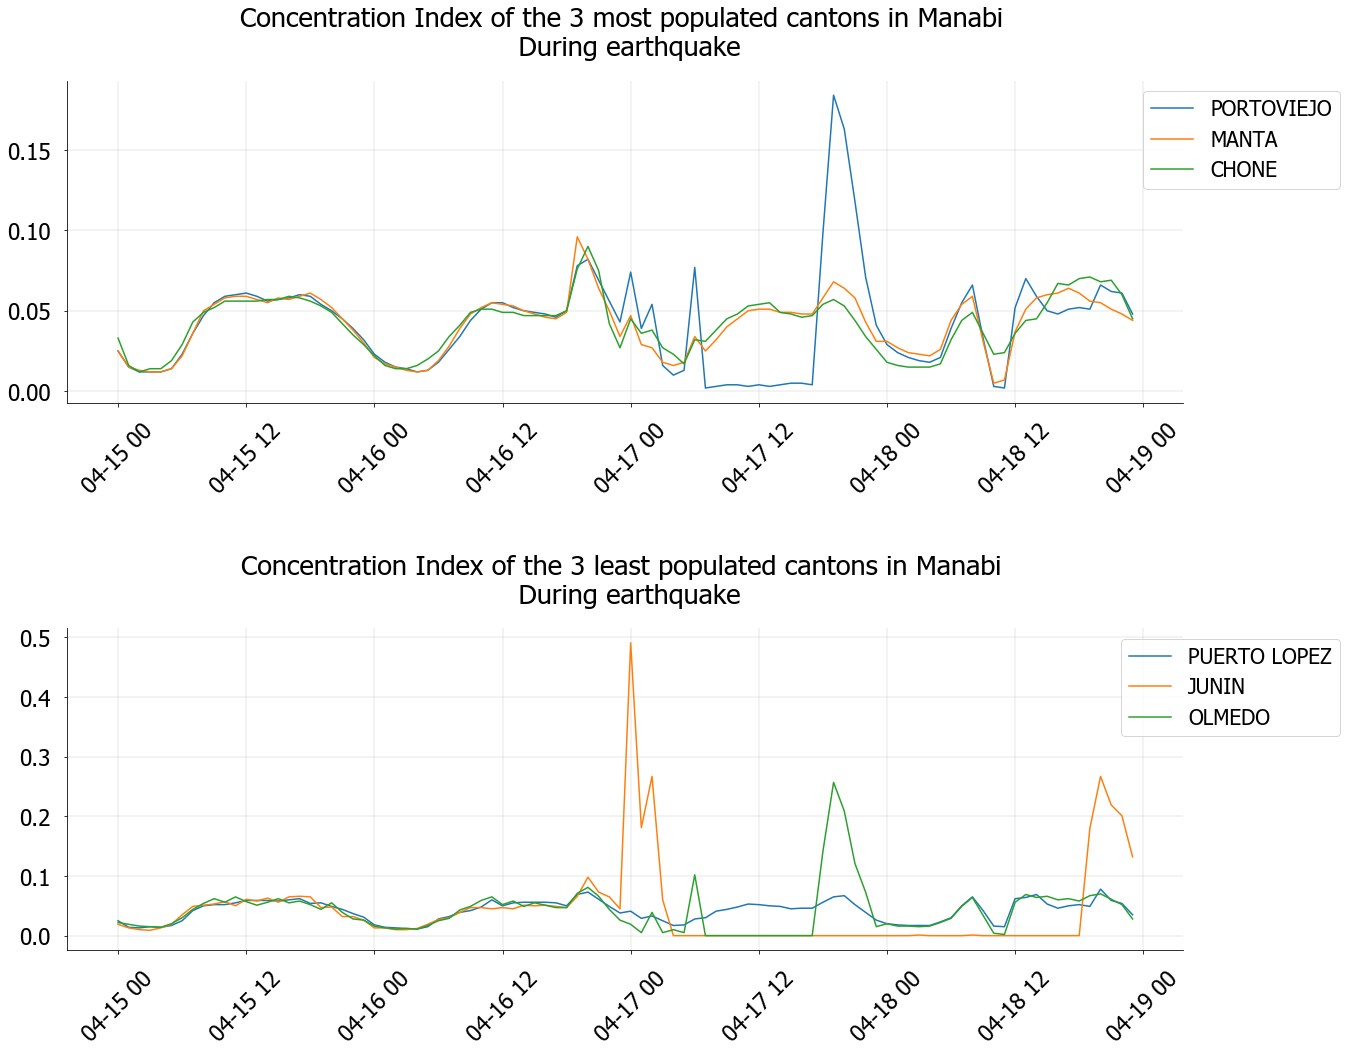

In [237]:
plt.rcParams ['font.family'] = 'Tahoma'
fig, (ax1, ax2)=  plt.subplots(2, 1, sharex=False, sharey= False, figsize=(20,16),gridspec_kw=dict( wspace=0.3,hspace=0.7)) 

top_pob= list(pob.sort_values(by='ano2016',ascending=False).head(3).canton)
tail_pob= list(pob.sort_values(by='ano2016',ascending=False).tail(3).canton)

col= ['tab:blue','tab:orange','tab:green','tab:purple','tab:red']

spine= [ax1, ax2]
for spi in spine:
    spi.spines["top"].set_visible(False)
    spi.spines["right"].set_visible(False)

for id_lab, prov in enumerate(top_pob):
    ax1.plot(conc_index_bef[prov], label= prov, color=col[id_lab])
    ax1.tick_params(axis='both', which='major', pad=13,labelsize=22.5)
    ax1.tick_params(axis= 'x', rotation=45)
    ax1.grid(linewidth=0.3)
    ax1.set_title("Concentration Index of the 3 most populated cantons in Manabi \n During earthquake",size=27)
    legend_x = 1.15
    legend_y = 1
    ax1.legend(loc='best',prop={'size': 21},bbox_to_anchor=(legend_x, legend_y),ncol=1)
    
for id_lab, prov in enumerate(tail_pob):
    ax2.plot(conc_index_bef[prov], label= prov, color=col[id_lab])
    ax2.tick_params(axis='both', which='major', pad=13,labelsize=22.5)
    ax2.tick_params(axis= 'x', rotation=45)
    ax2.grid(linewidth=0.3)
    ax2.set_title("Concentration Index of the 3 least populated cantons in Manabi \n During earthquake",size=27)
    legend_x = 1.15
    legend_y = 1
    ax2.legend(loc='best',prop={'size': 21},bbox_to_anchor=(legend_x, legend_y),ncol=1)
    
#plt.savefig('C:/Users/User/Desktop/Earthquake EC/Graphs/CI_bef_top_least_3.png', bbox_inches='tight', dpi=100)
plt.show()

## Concentration Index of most and least populated cantons after earthquake

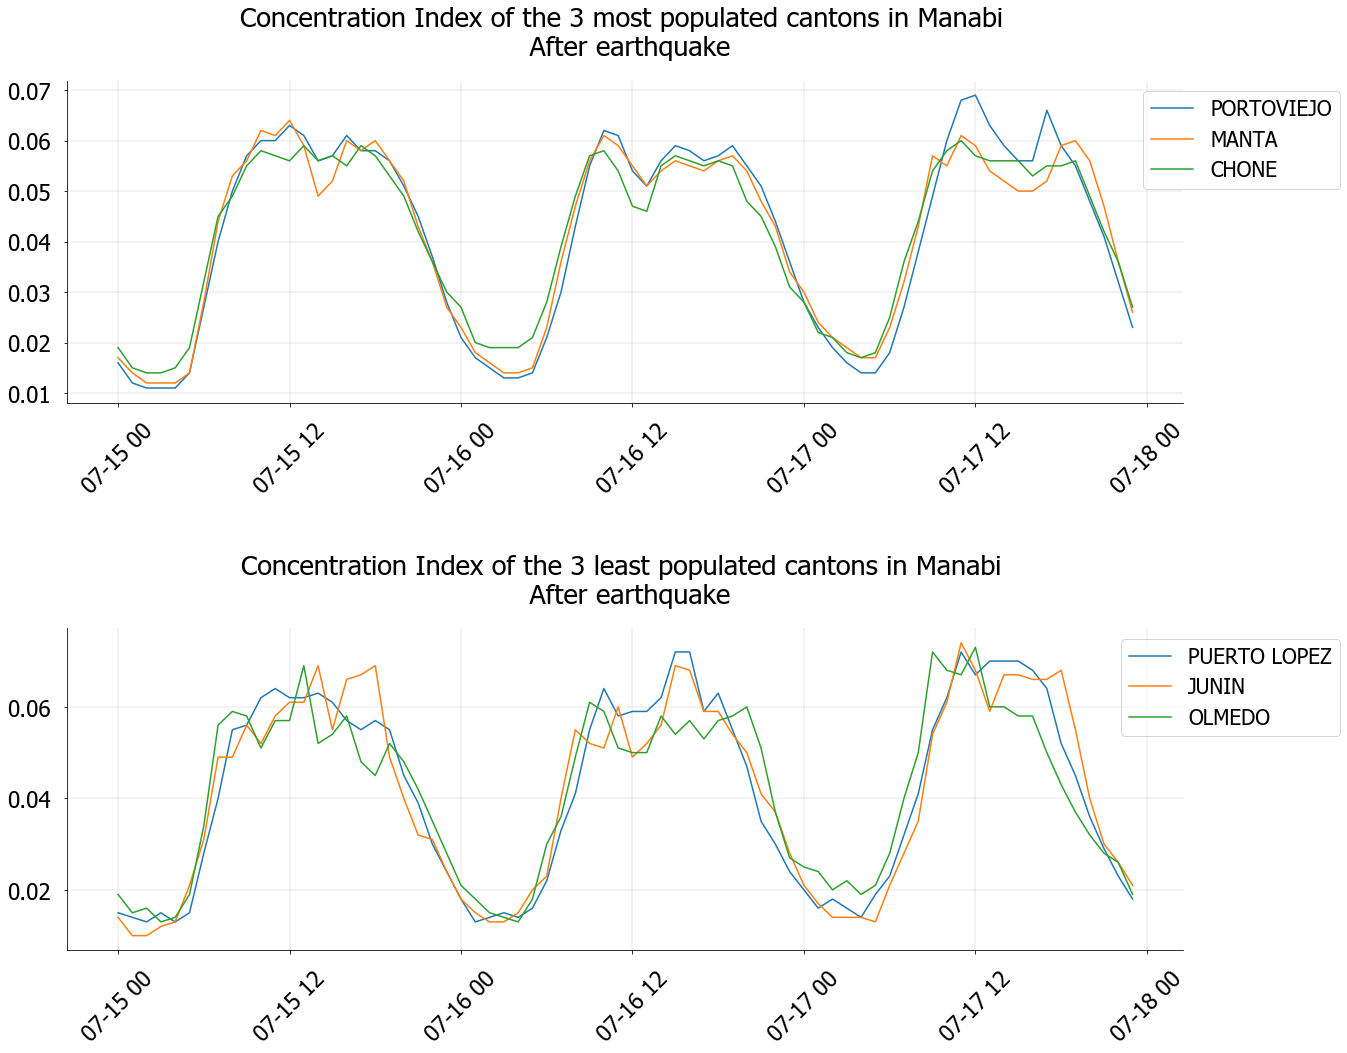

In [238]:
plt.rcParams ['font.family'] = 'Tahoma'
fig, (ax1, ax2)=  plt.subplots(2, 1, sharex=False, sharey= False, figsize=(20,16),gridspec_kw=dict( wspace=0.3,hspace=0.7)) 

top_pob= list(pob.sort_values(by='ano2016',ascending=False).head(3).canton)
tail_pob= list(pob.sort_values(by='ano2016',ascending=False).tail(3).canton)

col= ['tab:blue','tab:orange','tab:green','tab:purple','tab:red']

spine= [ax1, ax2]
for spi in spine:
    spi.spines["top"].set_visible(False)
    spi.spines["right"].set_visible(False)

for id_lab, prov in enumerate(top_pob):
    ax1.plot(conc_index_aft[prov], label= prov, color=col[id_lab])
    ax1.tick_params(axis='both', which='major', pad=13,labelsize=22.5)
    ax1.tick_params(axis= 'x', rotation=45)
    ax1.grid(linewidth=0.3)
    ax1.set_title("Concentration Index of the 3 most populated cantons in Manabi \n After earthquake",size=27)
    legend_x = 1.15
    legend_y = 1
    ax1.legend(loc='best',prop={'size': 21},bbox_to_anchor=(legend_x, legend_y),ncol=1)
    
for id_lab, prov in enumerate(tail_pob):
    ax2.plot(conc_index_aft[prov], label= prov, color=col[id_lab])
    ax2.tick_params(axis='both', which='major', pad=13,labelsize=22.5)
    ax2.tick_params(axis= 'x', rotation=45)
    ax2.grid(linewidth=0.3)
    ax2.set_title("Concentration Index of the 3 least populated cantons in Manabi \n After earthquake",size=27)
    legend_x = 1.15
    legend_y = 1
    ax2.legend(loc='best',prop={'size': 21},bbox_to_anchor=(legend_x, legend_y),ncol=1)

#plt.savefig('C:/Users/User/Desktop/Earthquake EC/Graphs/CI_aft_top_least_3.png', bbox_inches='tight', dpi=100)   
plt.show()

We will use the median of Concentration Index for this project, because the indicator doesn't have a normal distribution.

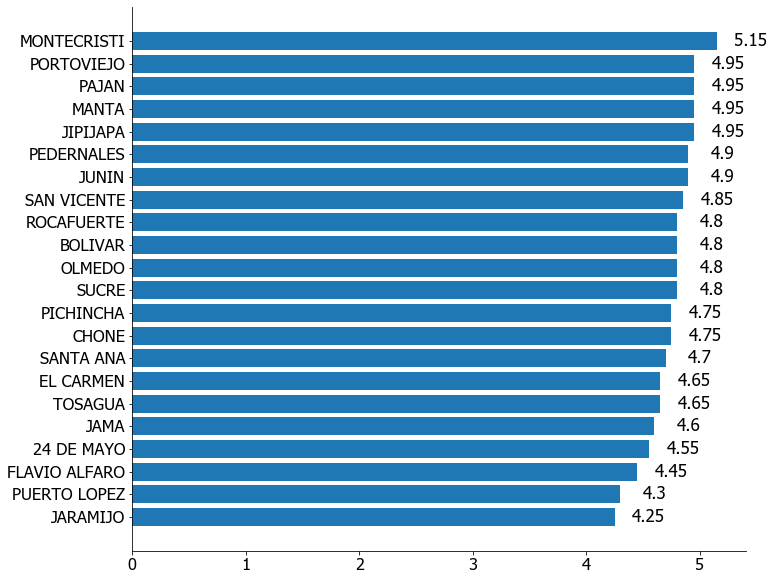

In [239]:
#axis : {row (1), columns (0)}
plt.rcParams ['font.family'] = 'Tahoma'
fig, (ax1 ) =  plt.subplots(1, 1, sharex=False, sharey= False, figsize=(11,10),gridspec_kw=dict( wspace=0.5)) 
for spine in [ "top", "right"]:
    ax1.spines[spine].set_visible(False)
    
# Median of Concentration Index
dat= (round(pd.DataFrame(conc_index_aft.median(axis=0), columns=['Median_con']),5)*100).sort_values(by=['Median_con'], ascending=True)

ax1.barh( np.arange(len(dat.index)), dat['Median_con'])
ax1.set_yticks( np.arange(len(dat.index)) )
ax1.set_yticklabels( list(dat.index))
ax1.tick_params(axis='both', labelsize=16.5)

for a,b in enumerate( list(dat.values.flatten()) ):
    ax1.text(b+0.3, a-0.4, round(b,3) , ha='center', va='bottom',fontsize=17)
    
plt.show()


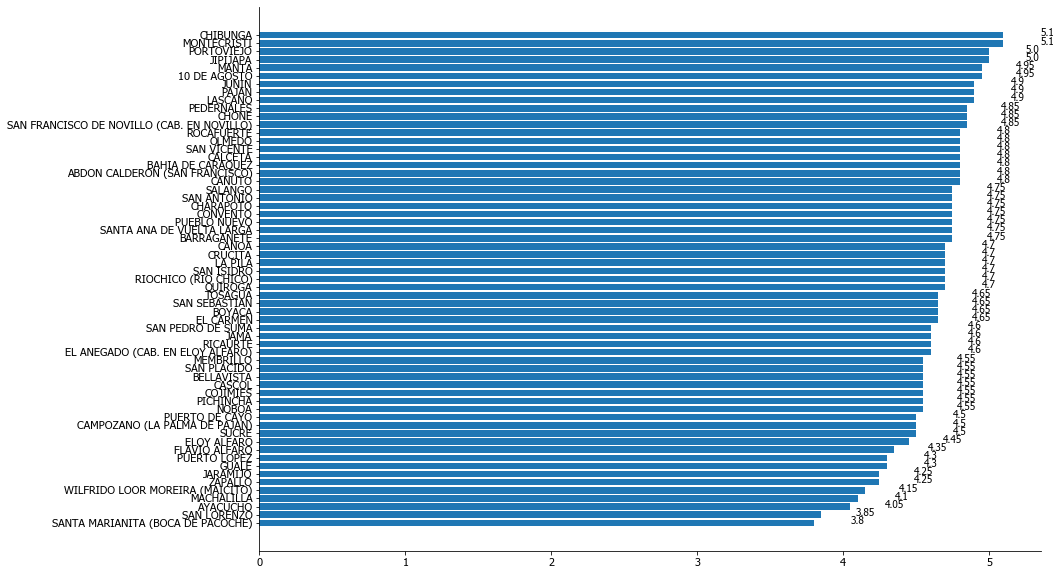

In [240]:
#axis : {row (1), columns (0)}
plt.rcParams ['font.family'] = 'Tahoma'
fig, (ax1 ) =  plt.subplots(1, 1, sharex=False, sharey= False, figsize=(14,10),gridspec_kw=dict( wspace=0.5)) 
for spine in [ "top", "right"]:
    ax1.spines[spine].set_visible(False)
    
# Median of Concentration Index
dat_parroq = (round(pd.DataFrame(conc_index_aft_parroq.median(axis=0), columns=['Median_con']),5)*100).sort_values(by=['Median_con'], ascending=True)

ax1.barh( np.arange(len(dat_parroq.index)), dat_parroq['Median_con'])
ax1.set_yticks( np.arange(len(dat_parroq.index)) )
ax1.set_yticklabels( list(dat_parroq.index))
ax1.tick_params(axis='both', labelsize=11)

for a,b in enumerate( list(dat_parroq.values.flatten()) ):
    ax1.text(b+0.3, a-0.4, round(b,3) , ha='center', va='bottom',fontsize=10)
    
plt.show()


## Resilience Index

Resilience Index is an important indicator when an earthquake occurs. I use the number of towers and population of 2016 and presents the following formulation:


$$
\Large RI_{ijt} = \frac{Number Of Towers_{ijt}}{Population_{iy}}*1000
$$

Where:

* $i:$ this subscript represents Manabi cantons
* $j:$ this subscript represents the hour of day $t$ 
* $t:$ this subscript represents one day
* $y:$ this subscript correspond to the year 2016
* $Number Of Towers_{ijt}:$  is the total number of active towers in the canton $i$ in the hour $j$ of the day $t$
* $Population_{iy}:$ is the projected population of the canton $i$ in the year $y$

After this, I estimate the median of this indicator by canton and parroquia

In [241]:
# number of tower for every 1000 people
tower_by_1000person_aft = round(aft_cant_tower.div( list(pob.ano2016) , axis=1 )*1000,1)
tower_by_1000person_bef = round(bef_cant_tower.div( list(pob.ano2016) , axis=1 )*1000,1)

# median of number of tower for every 1000 people
dat_res = pd.DataFrame(tower_by_1000person_aft.median(axis=0),columns=['Median_res'])

# Merge Conc. Index df and Res. Index df
df_canton_final = pd.merge(dat_res.reset_index(),dat.reset_index(),how='inner',on='index').set_index('index')

Merge df Resilience and Concentration Index by Parroquia

In [242]:

# number of tower for every 1000 people for the case by parroquia
tower_by_1000person_aft_parroq = round(aft_parroq_tower.div( list(pob_parroq.poblac) , axis=1 )*1000,1)
tower_by_1000person_bef_parroq = round(bef_parroq_tower.div( list(pob_parroq.poblac) , axis=1 )*1000,1)

# median of number of tower for every 1000 people for the case by parroquia
dat_res_parroq = pd.DataFrame(tower_by_1000person_aft_parroq.median(axis=0),columns=['Median_res'])

# Merge Conc. Index df and Res. Index df for the case by parroquia
df_parroq_final = pd.merge(dat_res_parroq.reset_index(),dat_parroq.reset_index(),how='inner',on='index').set_index('index')

I load new datasets

In [243]:
#poverty.head(15)

In [244]:
#health_center['Tipo de centro de salud'].value_counts()

In [245]:
# Health Centers in Manabi
health_center= pd.read_excel('C:/Users/User/Desktop/Earthquake EC/Data/centros de salud 2012.xls').sort_values(by='Cantón')

# Group by canton
health_center_cant = pd.DataFrame(health_center.groupby('Cantón')['Número de Centros de Salud'].sum()).reset_index()
health_center_cant.rename(columns = {'Cantón':'index'}, inplace = True)

# Place with Mobile Coverage in Manabi
mobile_coverage = pd.read_excel('C:/Users/User/Desktop/Earthquake EC/Data/cobertura movil 3g.xls')

# Mobile Coverage by canton
mobile_coverage_cant = mobile_coverage[mobile_coverage['Parroquia']== 
                                       'Total'].sort_values('Cantón')[['Cantón','Número de Sitios de Cobertura']]
mobile_coverage_cant.rename(columns = {'Cantón':'index'}, inplace = True)

# Number of Police Stations
police_station = pd.read_excel('C:/Users/User/Desktop/Earthquake EC/Data/unidades de policia comunitaria 2012.xls')

# Number of Police Stations by canton
police_station_cant = police_station[police_station['Parroquia']== 
                                       'Total'].sort_values('Cantón')[['Cantón','Número de Unidades de Policía Comunitaria']]
police_station_cant.rename(columns = {'Cantón':'index','Número de Unidades de Policía Comunitaria':'Nro.Poli.Com'}, inplace = True)

# Migration
migration = pd.read_excel('C:/Users/User/Desktop/Earthquake EC/Data/indice demografico 2010.xls')

migration.loc[(migration['Unnamed: 1']== 'BOLÍVAR'), 'Unnamed: 1']= 'BOLIVAR'
migration.loc[(migration['Unnamed: 1']== 'JARAMIJÓ'), 'Unnamed: 1']= 'JARAMIJO'
migration.loc[(migration['Unnamed: 1']== 'JUNÍN'), 'Unnamed: 1']= 'JUNIN'
migration.loc[(migration['Unnamed: 1']== 'PAJÁN'), 'Unnamed: 1']= 'PAJAN'
migration.loc[(migration['Unnamed: 1']== 'PUERTO LOÓPEZ'), 'Unnamed: 1']= 'PUERTO LOPEZ'

# La migración interna neta se la calcula a través de la diferencia entre el número de inmigrantes y de emigrantes. 
# El indicador también es conocido como saldo migratorio neto.

# Migrante: Se refiere a la persona que migra, a aquel sujeto que abandona el lugar en el que habita y que llega a 
# otra parte, para radicarse y constituir se hogar en él.

# Emigrante: Se refiere a la persona que emigra, a aquella que se traslada del lugar donde tiene establecido su hogar 
# (pueblo, ciudad, país), para establecerse en otro.(conflictos)

# Inmigrante: Se refiere a una persona que deja su país natal y se va para otro, para radicarse en él.( estudio)

internal_migration = migration[migration['Año']== 
                               'Migración interna neta'].sort_values('Unnamed: 1')[['Unnamed: 1','2010.1']]

internal_migration.columns = ['index', 'internal_migartion']
internal_migration.internal_migartion = internal_migration.internal_migartion.astype(np.float64)


# TASA NETA DE MIGRACIÓN INTERNA (POR MIL HABITANTES)
# Tasa neta de migración = Tasa de inmigración – Tasa de emigración.
rate_internal_migration = migration[(migration['Año']== 
                               'Tasa neta de migración interna (por mil habitantes)') ].sort_values('Unnamed: 1')[['Unnamed: 1','2010.1']]

rate_internal_migration.columns = ['index', 'rate_internal_migration']
rate_internal_migration.rate_internal_migration = rate_internal_migration.rate_internal_migration.astype(np.float64)

# Load poverty dataset
poverty = pd.read_excel('C:/Users/User/Desktop/Earthquake EC/Data/indice de pobreza.xls')

poverty.loc[(poverty['Unnamed: 1']== 'BOLÍVAR'), 'Unnamed: 1']= 'BOLIVAR'
poverty.loc[(poverty['Unnamed: 1']== 'JARAMIJÓ'), 'Unnamed: 1']= 'JARAMIJO'
poverty.loc[(poverty['Unnamed: 1']== 'JUNÍN'), 'Unnamed: 1']= 'JUNIN'
poverty.loc[(poverty['Unnamed: 1']== 'PAJÁN'), 'Unnamed: 1']= 'PAJAN'
poverty.loc[(poverty['Unnamed: 1']== 'PUERTO LOÓPEZ'), 'Unnamed: 1']= 'PUERTO LOPEZ'

# poverty by persona and Hogar 
poverty_hogar = poverty[poverty['Año']=='Pobreza por NBI (Hogares)'].sort_values('Unnamed: 1')[['Unnamed: 1',
                                                                            "2010.1","2010.2","2010.3"]]
poverty_hogar.columns = ['index', 'Poberty_hogar_total','Poberty_hogar_urbano','Poberty_hogar_rural']
poverty_hogar.Poberty_hogar_total = poverty_hogar.Poberty_hogar_total.astype(np.float64)
poverty_hogar.Poberty_hogar_urbano = poverty_hogar.Poberty_hogar_urbano.astype(np.float64)
poverty_hogar.Poberty_hogar_rural = poverty_hogar.Poberty_hogar_rural.astype(np.float64)

poverty_persona = poverty[poverty['Año']=='Pobreza por NBI (Personas)'].sort_values('Unnamed: 1')[['Unnamed: 1',
                                                                            "2010.1","2010.2","2010.3"]]
poverty_persona.columns = ['index', 'Poverty_pers_total','Poverty_pers_urbano','Poverty_pers_rural']
poverty_persona.Poverty_pers_total = poverty_persona.Poverty_pers_total.astype(np.float64)
poverty_persona.Poverty_pers_urbano = poverty_persona.Poverty_pers_urbano.astype(np.float64)
poverty_persona.Poverty_pers_rural = poverty_persona.Poverty_pers_rural.astype(np.float64)


# Load education dataset
education = pd.read_excel('C:/Users/User/Desktop/Earthquake EC/Data/indice de educacion.xls',skiprows=1).sort_values('Cantón')

education.loc[(education['Cantón']== 'BOLÍVAR'), 'Cantón']= 'BOLIVAR'
education.loc[(education['Cantón']== 'JARAMIJÓ'), 'Cantón']= 'JARAMIJO'
education.loc[(education['Cantón']== 'JUNÍN'), 'Cantón']= 'JUNIN'
education.loc[(education['Cantón']== 'PAJÁN'), 'Cantón']= 'PAJAN'
education.loc[(education['Cantón']== 'PUERTO LOÓPEZ'), 'Cantón']= 'PUERTO LOPEZ'

illiteracy = education.loc[education.Indicador=='Tasa de analfabetismo',['Cantón','Total']]
illiteracy.columns = ['index', 'illiteracy_rate']
illiteracy.illiteracy_rate = illiteracy.illiteracy_rate.astype(np.float64)


# Load escolaridad dataset
escolaridad_mas_24 = education.loc[education.Indicador==
                                   'Escolaridad promedio de la población de 24 y más años de edad',['Cantón','Total']]
escolaridad_mas_24.columns = ['index', 'escolaridad']
escolaridad_mas_24.escolaridad = escolaridad_mas_24.escolaridad.astype(np.float64)



## Prepare dataset by Parroquia

In [246]:
# health center by parroquia
health_parroquia = health_center[health_center.Parroquia.isin(list(
    df_parroq_final.index))].groupby('Parroquia')['Número de Centros de Salud'].sum().reset_index()
health_parroquia.rename(columns = {'Parroquia':'index'}, inplace = True)


# mobile coverage by parroquia
mob_parroq = mobile_coverage[~(mobile_coverage.Parroquia.isna() | (mobile_coverage.Parroquia == 'Total'))]
mob_parroq = mob_parroq[mob_parroq.Parroquia.isin(list(df_parroq_final.index))].groupby('Parroquia')['Número de Sitios de Cobertura'].sum().reset_index()
mob_parroq.rename(columns = {'Parroquia':'index'}, inplace = True)


# police station by parroquia
police_parroq= police_station[~(police_station.Parroquia.isna() | (police_station.Parroquia == 'Total'))]
police_parroq= police_parroq[police_parroq.Parroquia.isin(list(df_parroq_final.index))].groupby('Parroquia')['Número de Unidades de Policía Comunitaria'].sum().reset_index()
police_parroq.rename(columns = {'Parroquia':'index'}, inplace = True)

In [247]:
# list df by parroquia
parroq_df = [df_parroq_final.reset_index(), health_parroquia,mob_parroq, police_parroq]

# Merge df
df_merged_parroq = round( reduce(lambda  left,right: pd.merge(left,right,on=['index'],
                                            how='outer'), parroq_df), 2)

In [248]:
# list of dataframes
list_df = [df_canton_final.reset_index(), health_center_cant, mobile_coverage_cant, police_station_cant, 
           internal_migration, rate_internal_migration, poverty_hogar, poverty_persona,illiteracy,escolaridad_mas_24]

# Merge dataframes
df_merged = round( reduce(lambda  left,right: pd.merge(left,right,on=['index'],
                                            how='outer'), list_df), 2)


In [249]:
house_affect= pd.read_csv("../Data/casas_alta_afectacion.csv")

# NO ENCUENTRO: 'SAN PEDRO DE SUMA'
house_affect.loc[house_affect.NOMBRE=='SANTA MARIANITA','NOMBRE' ]= 'SANTA MARIANITA (BOCA DE PACOCHE)'
house_affect.loc[house_affect.NOMBRE=='ABDON CALDERON','NOMBRE' ]= 'ABDON CALDERON (SAN FRANCISCO)'
house_affect.loc[house_affect.NOMBRE=='CAMPOZANO','NOMBRE' ]= 'CAMPOZANO (LA PALMA DE PAJAN)'
house_affect.loc[house_affect.NOMBRE=='WILFRIDO LOOR MOREIRA','NOMBRE' ]= 'WILFRIDO LOOR MOREIRA (MAICITO)'
house_affect.loc[house_affect.NOMBRE=='EL ANEGADO','NOMBRE' ]= 'EL ANEGADO (CAB. EN ELOY ALFARO)'
house_affect.loc[house_affect.NOMBRE=='SAN VICENTE','NOMBRE' ]= 'SAN FRANCISCO DE NOVILLO (CAB. EN NOVILLO)'

In [250]:
pd.merge(df_merged_parroq, house_affect.rename(columns={'NOMBRE': 'index', 'alta':'CasasAfectadas'})[['index','CANTON','CasasAfectadas']],
        how='inner', on= 'index').to_excel('C:/Users/User/Desktop/Earthquake EC/Data/data_set_parroquia_new.xlsx',index=False)


In [251]:
pd.merge(df_merged_parroq, house_affect.rename(columns={'NOMBRE': 'index', 'alta':'CasasAfectadas'})[['index','CANTON','CasasAfectadas']],
        how='inner', on= 'index')

,index,Median_res,Median_con,Número de Centros de Salud,Número de Sitios de Cobertura,Número de Unidades de Policía Comunitaria,CANTON,CasasAfectadas
0,10 DE AGOSTO,9.40,4.95,1,1.0,1.0,PEDERNALES,372
1,ABDON CALDERON (SAN FRANCISCO),11.45,4.80,5,1.0,3.0,PORTOVIEJO,279
2,AYACUCHO,3.90,4.05,3,NaN,1.0,SANTA ANA,12
3,BAHIA DE CARAQUEZ,30.60,4.80,5,2.0,NaN,SUCRE,522
4,BARRAGANETE,7.95,4.75,2,1.0,1.0,PICHINCHA,2
5,BELLAVISTA,10.10,4.55,4,1.0,1.0,24 DE MAYO,20
6,BOYACA,9.60,4.65,1,NaN,1.0,CHONE,694
7,CALCETA,28.15,4.80,11,1.0,1.0,BOLIVAR,203
8,CAMPOZANO (LA PALMA DE PAJAN),4.05,4.50,8,1.0,1.0,PAJAN,11
9,CANOA,21.60,4.70,4,1.0,NaN,SAN VICENTE,280


In [252]:
#g = sns.PairGrid(df_merged, diag_sharey=False, corner=True)
#g.map_lower(sns.scatterplot)
#g.map_diag(sns.kdeplot)
#plt.show()

# adicionar manga del cura al canton EL CARMEN

In [253]:
final_df_canton = pd.merge(df_merged,
         pd.read_csv("../Data/autocorr_labels.csv").rename(columns={'CantonEvento': 'index'})[['index','severidad']],
         on=['index'],how='left').merge(
    pd.read_csv("../Data/casas_alta_afectacion.csv").groupby('CANTON').sum().reset_index().rename(columns={'CANTON': 'index'})
    [['index','alta']], on=['index'],how='left')

Replace the severity NAN values with the severity mode of the closest cantons.

In [254]:
moda_faltante = list(final_df_canton.loc[ ( (final_df_canton['index']== '24 DE MAYO') | 
                (final_df_canton['index']== 'OLMEDO')| 
                (final_df_canton['index']== 'PUERTO LOPEZ') | 
                (final_df_canton['index']== 'MONTECRISTI') | 
                (final_df_canton['index']== 'MANTA')|
               (final_df_canton['index']== 'SANTA ANA')|
               (final_df_canton['index']== 'PORTOVIEJO')|
               (final_df_canton['index']== 'JARAMIJO') ), 'severidad'].mode().values)[0]

final_df_canton.loc[final_df_canton.severidad.isna(), 'severidad']= moda_faltante

In [255]:
final_df_canton.loc[( (final_df_canton['index']== 'PEDERNALES') | (final_df_canton['index']== 'JAMA') | (final_df_canton['index']== 'SUCRE')|
(final_df_canton['index']== 'SAN VICENTE') | (final_df_canton['index']== 'CHONE')|(final_df_canton['index']== 'FLAVIO ALFARO')|
(final_df_canton['index']== 'EL CARMEN') ), 'zona']= 'Norte'

final_df_canton.loc[( (final_df_canton['index']== 'SUCRE') | (final_df_canton['index']== 'TOSAGUA') | (final_df_canton['index']== 'ROCAFUERTE')|
(final_df_canton['index']== 'PORTOVIEJO') | (final_df_canton['index']== 'SANTA ANA')|(final_df_canton['index']== 'JUNIN')|
(final_df_canton['index']== 'BOLIVAR')| (final_df_canton['index']== 'PICHINCHA') ), 'zona']= 'Centro'

final_df_canton.loc[( (final_df_canton['index']== 'JARAMIJO') | (final_df_canton['index']== 'MANTA') | (final_df_canton['index']== 'MONTECRISTI')|
(final_df_canton['index']== 'JIPIJAPA') | (final_df_canton['index']== '24 DE MAYO')|(final_df_canton['index']== 'OLMEDO')|
(final_df_canton['index']== 'PAJAN')| (final_df_canton['index']== 'PUERTO LOPEZ') ), 'zona']= 'Sur'


In [256]:
final_df_canton.loc[final_df_canton.zona=='Norte', 'color_zona']= 'tab:blue'
final_df_canton.loc[final_df_canton.zona=='Centro', 'color_zona']= 'tab:red'
final_df_canton.loc[final_df_canton.zona=='Sur', 'color_zona']= 'tab:green'

In [257]:
final_df_canton.rename(columns = {'alta':'Nro casas afectadas'}, inplace = True)

final_df_canton['Número de Sitios de Cobertura'] = final_df_canton['Número de Sitios de Cobertura'].fillna(final_df_canton['Número de Sitios de Cobertura'].median())

In [258]:
distance_dict={
    'index':["24 DE MAYO","BOLIVAR","CHONE","EL CARMEN","FLAVIO ALFARO","JAMA","JARAMIJO","JIPIJAPA","JUNIN","MANTA","MONTECRISTI",
"OLMEDO","PAJAN","PEDERNALES","PICHINCHA","PORTOVIEJO","PUERTO LOPEZ","ROCAFUERTE","SAN VICENTE","SANTA ANA","SUCRE","TOSAGUA"],
    'distance': [227,224,153,93,157,51,188,238,181,195,195,238,278,0,235,182,294,167,109,203,211,157] }


In [259]:
# union con columna distance
final_df_canton= pd.merge(final_df_canton,pd.DataFrame(distance_dict),how='inner',on='index')

In [260]:
# merge con nueva data
final_df_canton= pd.merge(final_df_canton , pob.rename(columns={'canton': 'index', 'ano2016':'poblacion2016'})[['index','poblacion2016']],how='inner',on='index')

In [261]:
# Add pib value
final_df_canton = pd.merge(final_df_canton,
         pd.read_excel("../Data/Cuentas_Cantonales.xlsx",sheet_name=1).rename(columns={'CANTON': 'index', 
                                                                          'ECONOMÍA TOTAL': 'pib'})[['index','pib']],
         on=['index'],how='left')

In [262]:
final_df_canton.loc[(final_df_canton.pib<= np.percentile(final_df_canton.pib, 25)), 'quartile']= 'first quartile'
final_df_canton.loc[( (final_df_canton.pib> np.percentile(final_df_canton.pib, 25)) &
                    (final_df_canton.pib<= np.percentile(final_df_canton.pib, 50)) ), 'quartile']= 'second quartile'
final_df_canton.loc[( (final_df_canton.pib> np.percentile(final_df_canton.pib, 50)) &
                    (final_df_canton.pib<= np.percentile(final_df_canton.pib, 75)) ), 'quartile']= 'third quartile'
final_df_canton.loc[(final_df_canton.pib> np.percentile(final_df_canton.pib, 75)) , 'quartile']= 'more third quartile'

## Correlation Matrix

In [264]:
round(final_df_canton.corr(method='spearman'),3)

,Median_res,Median_con,Número de Centros de Salud,Número de Sitios de Cobertura,Nro.Poli.Com,internal_migartion,rate_internal_migration,Poberty_hogar_total,Poberty_hogar_urbano,Poberty_hogar_rural,Poverty_pers_total,Poverty_pers_urbano,Poverty_pers_rural,illiteracy_rate,escolaridad,severidad,Nro casas afectadas,distance,poblacion2016,pib
Median_res,1.000,0.642,0.551,0.549,0.369,0.029,0.324,-0.423,-0.223,0.151,-0.460,-0.210,0.140,-0.591,0.683,-0.117,0.372,-0.011,0.516,0.637
Median_con,0.642,1.000,0.535,0.606,0.396,-0.174,-0.037,-0.128,-0.172,0.312,-0.140,-0.151,0.318,-0.173,0.375,-0.124,0.171,0.108,0.451,0.494
Número de Centros de Salud,0.551,0.535,1.000,0.579,0.679,-0.556,-0.145,-0.368,-0.520,0.211,-0.388,-0.508,0.186,-0.223,0.529,0.027,0.330,0.178,0.789,0.542
Número de Sitios de Cobertura,0.549,0.606,0.579,1.000,0.552,-0.387,-0.011,-0.314,-0.100,0.433,-0.295,-0.076,0.428,-0.232,0.528,-0.144,0.368,-0.021,0.617,0.691
Nro.Poli.Com,0.369,0.396,0.679,0.552,1.000,-0.449,-0.094,-0.164,-0.210,0.245,-0.169,-0.202,0.240,-0.179,0.242,-0.103,0.352,-0.003,0.687,0.513
internal_migartion,0.029,-0.174,-0.556,-0.387,-0.449,1.000,0.701,0.137,0.401,-0.173,0.118,0.365,-0.174,-0.221,-0.041,0.234,-0.470,0.057,-0.578,-0.261
rate_internal_migration,0.324,-0.037,-0.145,-0.011,-0.094,0.701,1.000,-0.464,0.013,-0.377,-0.471,-0.018,-0.379,-0.696,0.501,0.010,-0.045,-0.145,0.012,0.278
Poberty_hogar_total,-0.423,-0.128,-0.368,-0.314,-0.164,0.137,-0.464,1.000,0.694,0.418,0.994,0.688,0.429,0.752,-0.743,0.341,-0.511,0.359,-0.564,-0.712
Poberty_hogar_urbano,-0.223,-0.172,-0.520,-0.100,-0.210,0.401,0.013,0.694,1.000,0.340,0.717,0.995,0.359,0.344,-0.455,0.310,-0.443,0.238,-0.458,-0.326
Poberty_hogar_rural,0.151,0.312,0.211,0.433,0.245,-0.173,-0.377,0.418,0.340,1.000,0.437,0.338,0.998,0.273,-0.129,0.181,-0.160,0.119,0.180,0.023


p-values of Correlation Matrix

In [265]:
r, p= st.spearmanr(final_df_canton,axis=0)

# Adjust Pvalue matrix
p_value_matrix = round(pd.DataFrame(p).iloc[1:,1:], 5)
p_value_matrix.columns= list(final_df_canton.iloc[:,1:].columns)
p_value_matrix.index= list(final_df_canton.iloc[:,1:].columns)

In [266]:
rho = final_df_canton.corr(method='spearman')
pval = final_df_canton.corr(method=lambda x, y: st.spearmanr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
p_value_ast = rho.round(3).astype(str) + p


In [267]:
p_value_ast

,Median_res,Median_con,Número de Centros de Salud,Número de Sitios de Cobertura,Nro.Poli.Com,internal_migartion,rate_internal_migration,Poberty_hogar_total,Poberty_hogar_urbano,Poberty_hogar_rural,Poverty_pers_total,Poverty_pers_urbano,Poverty_pers_rural,illiteracy_rate,escolaridad,severidad,Nro casas afectadas,distance,poblacion2016,pib
Median_res,1.0***,0.642***,0.551***,0.549***,0.369*,0.029,0.324,-0.423**,-0.223,0.151,-0.46**,-0.21,0.14,-0.591***,0.683***,-0.117,0.372*,-0.011,0.516**,0.637***
Median_con,0.642***,1.0***,0.535**,0.606***,0.396*,-0.174,-0.037,-0.128,-0.172,0.312,-0.14,-0.151,0.318,-0.173,0.375*,-0.124,0.171,0.108,0.451**,0.494**
Número de Centros de Salud,0.551***,0.535**,1.0***,0.579***,0.679***,-0.556***,-0.145,-0.368*,-0.52**,0.211,-0.388*,-0.508**,0.186,-0.223,0.529**,0.027,0.33,0.178,0.789***,0.542***
Número de Sitios de Cobertura,0.549***,0.606***,0.579***,1.0***,0.552***,-0.387*,-0.011,-0.314,-0.1,0.433**,-0.295,-0.076,0.428**,-0.232,0.528**,-0.144,0.368*,-0.021,0.617***,0.691***
Nro.Poli.Com,0.369*,0.396*,0.679***,0.552***,1.0***,-0.449**,-0.094,-0.164,-0.21,0.245,-0.169,-0.202,0.24,-0.179,0.242,-0.103,0.352,-0.003,0.687***,0.513**
internal_migartion,0.029,-0.174,-0.556***,-0.387*,-0.449**,1.0***,0.701***,0.137,0.401*,-0.173,0.118,0.365*,-0.174,-0.221,-0.041,0.234,-0.47**,0.057,-0.578***,-0.261
rate_internal_migration,0.324,-0.037,-0.145,-0.011,-0.094,0.701***,1.0***,-0.464**,0.013,-0.377*,-0.471**,-0.018,-0.379*,-0.696***,0.501**,0.01,-0.045,-0.145,0.012,0.278
Poberty_hogar_total,-0.423**,-0.128,-0.368*,-0.314,-0.164,0.137,-0.464**,1.0***,0.694***,0.418*,0.994***,0.688***,0.429**,0.752***,-0.743***,0.341,-0.511**,0.359,-0.564***,-0.712***
Poberty_hogar_urbano,-0.223,-0.172,-0.52**,-0.1,-0.21,0.401*,0.013,0.694***,1.0***,0.34,0.717***,0.995***,0.359,0.344,-0.455**,0.31,-0.443**,0.238,-0.458**,-0.326
Poberty_hogar_rural,0.151,0.312,0.211,0.433**,0.245,-0.173,-0.377*,0.418*,0.34,1.0***,0.437**,0.338,0.998***,0.273,-0.129,0.181,-0.16,0.119,0.18,0.023


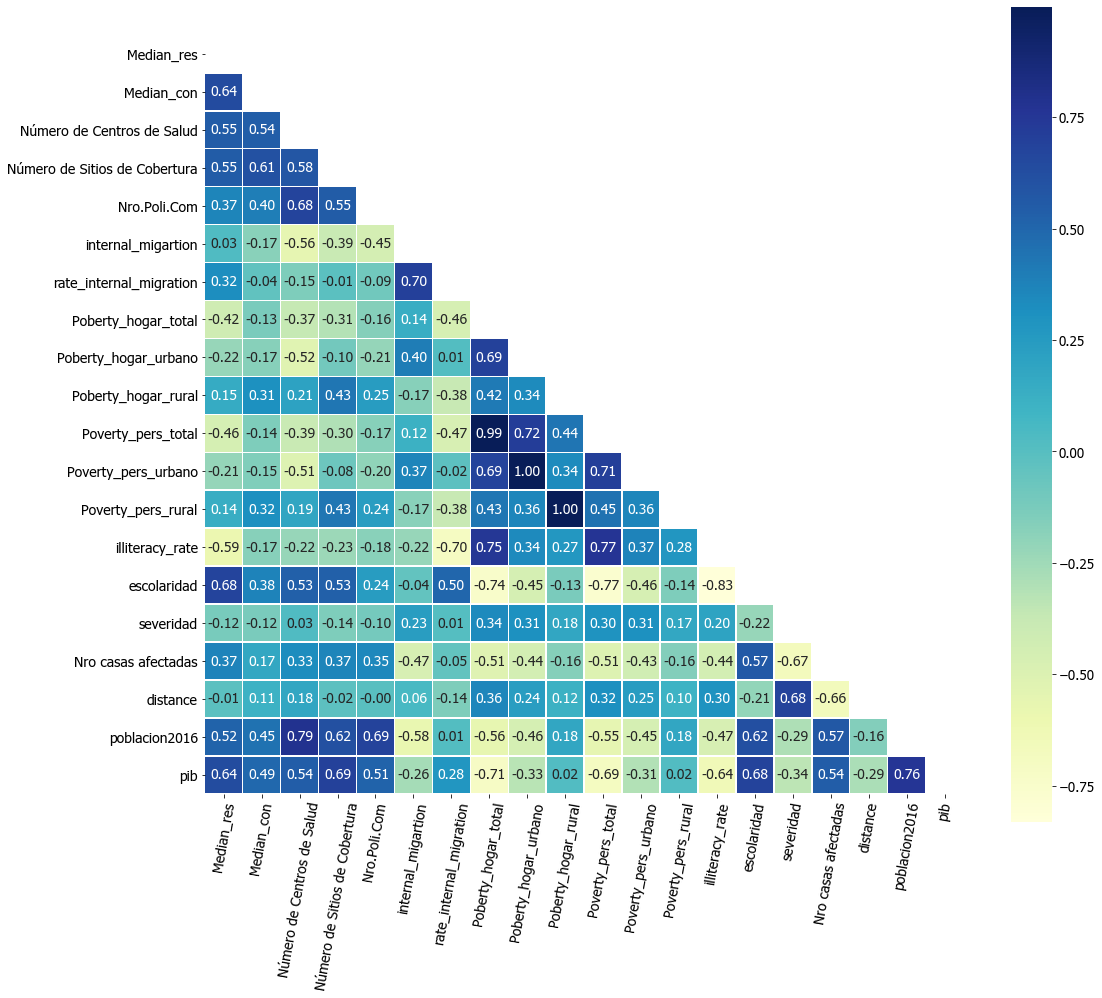

In [268]:
plt.figure(figsize = (17,15))
corrS1 = final_df_canton.corr(method='spearman') 
mask1 = np.zeros_like(corrS1)
mask1[np.triu_indices_from(mask1)] = True
sns.heatmap(corrS1, cmap='YlGnBu',linewidths=.5,square=True,mask=mask1, annot=True, annot_kws={"size": 14},fmt='.2f') 

plt.yticks(rotation=360,size=14)
plt.xticks(rotation=80, size=14) 

#plt.savefig('heatmapRedYBlue.png', bbox_inches='tight', dpi=100)
plt.show()

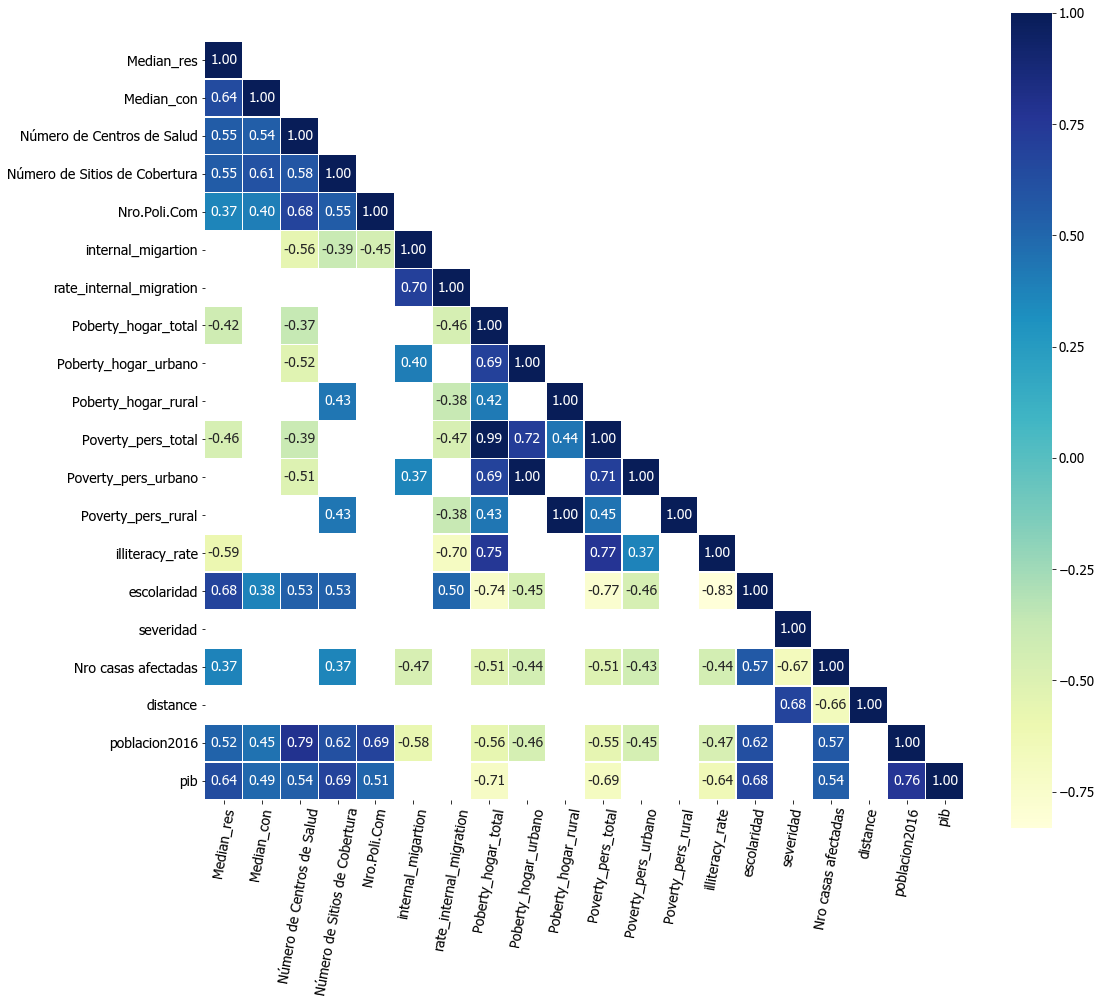

In [269]:
plt.figure(figsize = (17,15))
corrS1 = final_df_canton.corr(method='spearman') 

sns.heatmap(corrS1, cmap='YlGnBu',linewidths=.5,square=True,mask=np.invert(np.tril(pval<0.1)),
            annot=True, annot_kws={"size": 14},fmt='.2f') 

plt.yticks(rotation=360,size=14)
plt.xticks(rotation=80, size=14) 

#plt.savefig('heatmapRedYBlue.png', bbox_inches='tight', dpi=100)
plt.show()


In [270]:
#df_merged.to_excel('C:/Users/User/Desktop/Earthquake EC/Data/data_set_cantons.xlsx',index=False)
#df_merged_parroq.to_excel('C:/Users/User/Desktop/Earthquake EC/Data/data_set_parroq.xlsx',index=False)

#final_df_canton.to_excel('C:/Users/User/Desktop/Earthquake EC/Data/data_set_new_cantons.xlsx',index=False)

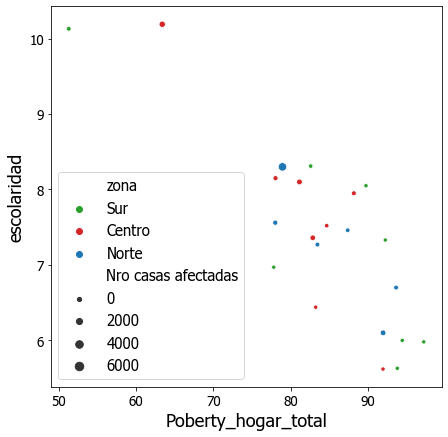

In [108]:
plt.rcParams ['font.family'] = 'Tahoma'

plt.subplots(figsize=(7,7))
sns.scatterplot(x='Poberty_hogar_total', y='escolaridad',data= final_df_canton,
                hue="zona", size=final_df_canton['Nro casas afectadas'], palette=
                dict({'Sur':'tab:green',
                  'Centro':'tab:red',
                  'Norte': 'tab:blue'}) )
plt.legend(fontsize=15)
plt.show()

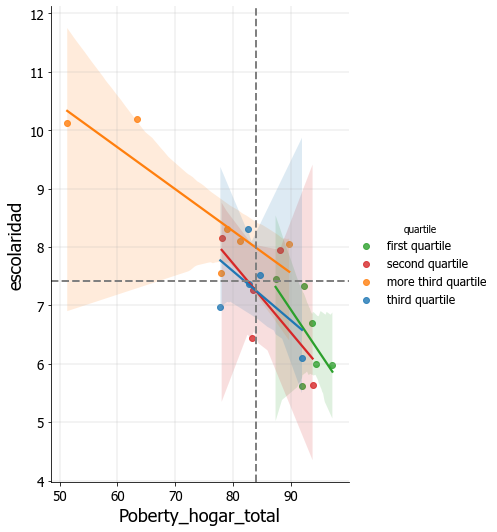

In [271]:
plt.rcParams ['font.family'] = 'Tahoma'

sns.lmplot(x='Poberty_hogar_total', y='escolaridad',data= final_df_canton, hue='quartile', fit_reg=True,
          height=7.5 , aspect=0.7, order=1,
          palette=
                dict({'first quartile':'tab:green',
                  'second quartile':'tab:red',
                  'third quartile': 'tab:blue',
                     'more third quartile': 'tab:orange'}))
plt.axvline( final_df_canton.Poberty_hogar_total.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)
plt.axhline( final_df_canton.escolaridad.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)
plt.grid(linewidth=0.3)
plt.show()

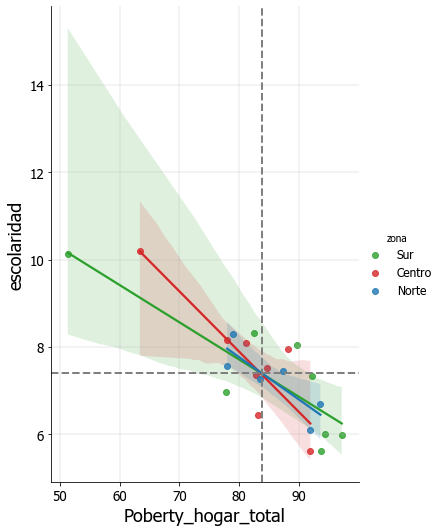

In [273]:
plt.rcParams ['font.family'] = 'Tahoma'

sns.lmplot(x='Poberty_hogar_total', y='escolaridad',data= final_df_canton, hue='zona', fit_reg=True,
          height=7.5 , aspect=0.7, order=1,
          palette=
                dict({'Sur':'tab:green',
                  'Centro':'tab:red',
                  'Norte': 'tab:blue'}))
plt.axvline( final_df_canton.Poberty_hogar_total.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)
plt.axhline( final_df_canton.escolaridad.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)
plt.grid(linewidth=0.3)
plt.show()

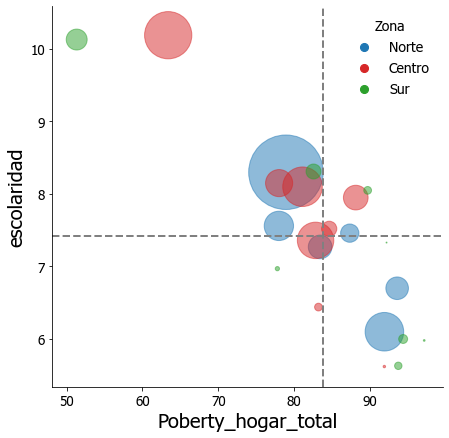

In [274]:
plt.rcParams ['font.family'] = 'Tahoma'

fig, ax1 = plt.subplots(figsize=(7,7))
for spine in [ "top", "right"]:
    ax1.spines[spine].set_visible(False)

X= 'Poberty_hogar_total'
Y= 'escolaridad'
S= 'Nro casas afectadas'
a1= ax1.scatter(x=X,y=Y, s=S, c='color_zona', data= final_df_canton[final_df_canton.zona=="Norte"], alpha=0.5)
a2= ax1.scatter(x=X,y=Y, s=S, c='color_zona', data= final_df_canton[final_df_canton.zona=="Centro"],
           alpha=0.5)
a3= ax1.scatter(x=X,y=Y, s=S, c='color_zona', data= final_df_canton[final_df_canton.zona=="Sur"],
           alpha=0.5)

ax1.set_xlabel('Poberty_hogar_total',size= 20)
ax1.set_ylabel('escolaridad',size= 20)
gll = plt.scatter([],[], s=65, marker='o', color='tab:blue')
gl = plt.scatter([],[], s=65, marker='o', color='tab:red')
ga = plt.scatter([],[], s=65, marker='o', color='tab:green')

cl= ['tab:blue','tab:red','tab:green']
lab= ['Norte','Centro', 'Sur']

plt.legend((gll,gl,ga),('Norte', 'Centro', 'Sur'), scatterpoints=1,loc='best',ncol=1,
       fontsize=14, title="Zona", title_fontsize= 14,frameon=False)
plt.axvline( final_df_canton.Poberty_hogar_total.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)
plt.axhline( final_df_canton.escolaridad.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)
plt.show()



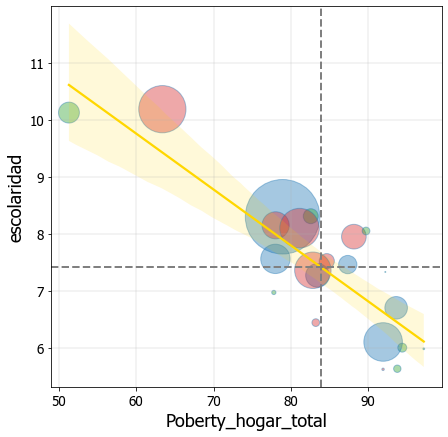

In [275]:
plt.figure(figsize=(7,7))

sns.regplot(data= final_df_canton, x='Poberty_hogar_total',y='escolaridad', marker='o',
    scatter_kws={'s': final_df_canton['Nro casas afectadas'], 'facecolors':final_df_canton['color_zona'], 'alpha': 0.4 },
    line_kws={"color": "gold"})
plt.axvline( final_df_canton.Poberty_hogar_total.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)
plt.axhline( final_df_canton.escolaridad.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)
plt.grid(linewidth=0.3)
plt.show()


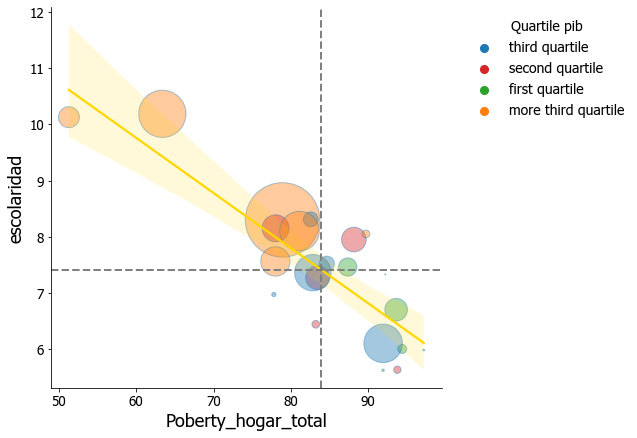

In [276]:
plt.figure(figsize=(7,7))

sns.regplot(data= final_df_canton, x='Poberty_hogar_total', y='escolaridad', marker='o',
    scatter_kws={'s': final_df_canton['Nro casas afectadas'], 'facecolors':['tab:green' if v == 'first quartile' else 'tab:red' if v == 'second quartile' else 'tab:blue' if v == 'third quartile' else 'tab:orange' for v in final_df_canton.quartile ]
, 'alpha': 0.4 },
    line_kws={"color": "gold"})

sns.despine(top=True, right=True, left=False, bottom=False)
gll = plt.scatter([],[], s=65, marker='o', color='tab:blue')
gl = plt.scatter([],[], s=65, marker='o', color='tab:red')
ga = plt.scatter([],[], s=65, marker='o', color='tab:green')
gs = plt.scatter([],[], s=65, marker='o', color='tab:orange')

legend_x = 1.5
legend_y = 1

cl= ['tab:blue','tab:red','tab:green','tab:orange']
lab= ['third quartile','second quartile', 'first quartile','more third quartile']

plt.legend((gll,gl,ga,gs),('third quartile','second quartile', 'first quartile','more third quartile'), scatterpoints=1,loc='best',ncol=1,
       fontsize=14, title="Quartile pib", title_fontsize= 14,frameon=False,bbox_to_anchor=(legend_x, legend_y))

plt.axvline( final_df_canton.Poberty_hogar_total.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)
plt.axhline( final_df_canton.escolaridad.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)

plt.show()

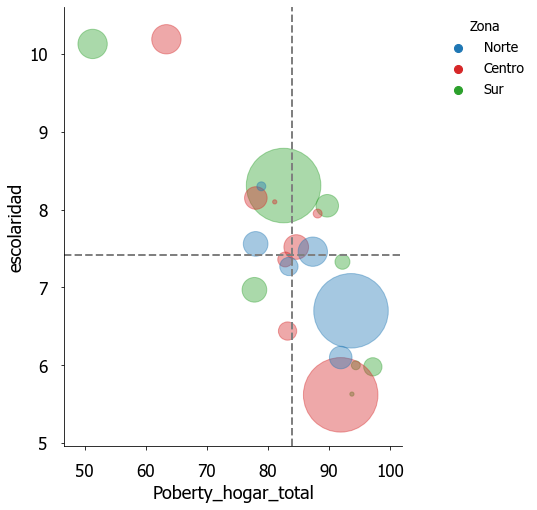

In [277]:
size=18
params = {'legend.fontsize': 'large',
          'figure.figsize': (7,7),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)

#  hue= 'severidad'
sns.lmplot(x='Poberty_hogar_total', y='escolaridad',data= final_df_canton,height=7, aspect=0.8,hue='zona',
          scatter_kws={"s": final_df_canton['Nro casas afectadas'],'alpha': 0.4 },legend=False, fit_reg=False,
          palette=
                dict({'Sur':'tab:green',
                  'Centro':'tab:red',
                  'Norte': 'tab:blue'}))
plt.tick_params(axis='both', which='major', pad=13,labelsize=17)
legend_x = 1.4
legend_y = 1

gll = plt.scatter([],[], s=65, marker='o', color='tab:blue')
gl = plt.scatter([],[], s=65, marker='o', color='tab:red')
ga = plt.scatter([],[], s=65, marker='o', color='tab:green')

cl= ['tab:blue','tab:red','tab:green']
lab= ['Norte','Centro', 'Sur']

plt.legend((gll,gl,ga),('Norte', 'Centro', 'Sur'), scatterpoints=1,loc='best',ncol=1,
       fontsize=14, title="Zona", title_fontsize= 14,frameon=False,bbox_to_anchor=(legend_x, legend_y))

plt.axvline( final_df_canton.Poberty_hogar_total.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)
plt.axhline( final_df_canton.escolaridad.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)
plt.show()

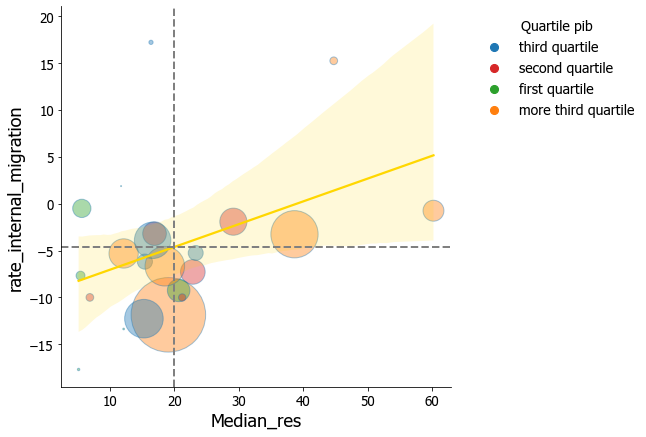

In [278]:
plt.figure(figsize=(7,7))

sns.regplot(data= final_df_canton, x='Median_res', y='rate_internal_migration', marker='o',
    scatter_kws={'s': final_df_canton['Nro casas afectadas'], 'facecolors':['tab:green' if v == 'first quartile' else 'tab:red' if v == 'second quartile' else 'tab:blue' if v == 'third quartile' else 'tab:orange' for v in final_df_canton.quartile ]
, 'alpha': 0.4 },
    line_kws={"color": "gold"})

sns.despine(top=True, right=True, left=False, bottom=False)
gll = plt.scatter([],[], s=65, marker='o', color='tab:blue')
gl = plt.scatter([],[], s=65, marker='o', color='tab:red')
ga = plt.scatter([],[], s=65, marker='o', color='tab:green')
gs = plt.scatter([],[], s=65, marker='o', color='tab:orange')

legend_x = 1.5
legend_y = 1

cl= ['tab:blue','tab:red','tab:green','tab:orange']
lab= ['third quartile','second quartile', 'first quartile','more third quartile']

plt.legend((gll,gl,ga,gs),('third quartile','second quartile', 'first quartile','more third quartile'), scatterpoints=1,loc='best',ncol=1,
       fontsize=14, title="Quartile pib", title_fontsize= 14,frameon=False,bbox_to_anchor=(legend_x, legend_y))
plt.axvline( final_df_canton.Median_res.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)
plt.axhline( final_df_canton.rate_internal_migration.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)
plt.show()

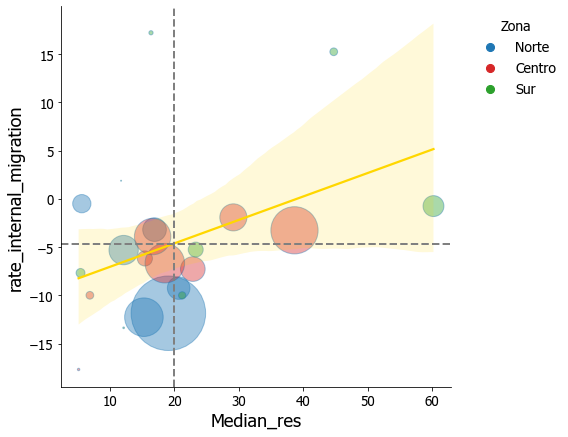

In [279]:
plt.figure(figsize=(7,7))

sns.regplot(data= final_df_canton, x='Median_res', y='rate_internal_migration', marker='o',
    scatter_kws={'s': final_df_canton['Nro casas afectadas'], 'facecolors':final_df_canton['color_zona'], 'alpha': 0.4 },
    line_kws={"color": "gold"})

sns.despine(top=True, right=True, left=False, bottom=False)
gll = plt.scatter([],[], s=65, marker='o', color='tab:blue')
gl = plt.scatter([],[], s=65, marker='o', color='tab:red')
ga = plt.scatter([],[], s=65, marker='o', color='tab:green')

legend_x = 1.3
legend_y = 1

cl= ['tab:blue','tab:red','tab:green']
lab= ['Norte','Centro', 'Sur']

plt.legend((gll,gl,ga),('Norte', 'Centro', 'Sur'), scatterpoints=1,loc='best',ncol=1,
       fontsize=14, title="Zona", title_fontsize= 14,frameon=False,bbox_to_anchor=(legend_x, legend_y))
plt.axvline( final_df_canton.Median_res.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)
plt.axhline( final_df_canton.rate_internal_migration.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)
plt.show()

In [280]:
final_df_canton.columns

Index(['index', 'Median_res', 'Median_con', 'Número de Centros de Salud',
       'Número de Sitios de Cobertura', 'Nro.Poli.Com', 'internal_migartion',
       'rate_internal_migration', 'Poberty_hogar_total',
       'Poberty_hogar_urbano', 'Poberty_hogar_rural', 'Poverty_pers_total',
       'Poverty_pers_urbano', 'Poverty_pers_rural', 'illiteracy_rate',
       'escolaridad', 'severidad', 'Nro casas afectadas', 'zona', 'color_zona',
       'distance', 'poblacion2016', 'pib', 'quartile'],
      dtype='object')

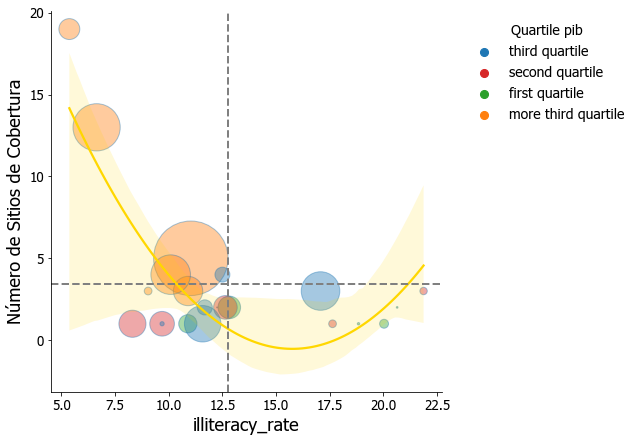

In [281]:
plt.figure(figsize=(7,7))

sns.regplot(data= final_df_canton, x='illiteracy_rate', y='Número de Sitios de Cobertura', marker='o',
    scatter_kws={'s': final_df_canton['Nro casas afectadas'], 'facecolors':['tab:green' if v == 'first quartile' else 'tab:red' if v == 'second quartile' else 'tab:blue' if v == 'third quartile' else 'tab:orange' for v in final_df_canton.quartile ]
, 'alpha': 0.4 },
    line_kws={"color": "gold"},order=2)

sns.despine(top=True, right=True, left=False, bottom=False)
gll = plt.scatter([],[], s=65, marker='o', color='tab:blue')
gl = plt.scatter([],[], s=65, marker='o', color='tab:red')
ga = plt.scatter([],[], s=65, marker='o', color='tab:green')
gs = plt.scatter([],[], s=65, marker='o', color='tab:orange')

legend_x = 1.5
legend_y = 1

cl= ['tab:blue','tab:red','tab:green','tab:orange']
lab= ['third quartile','second quartile', 'first quartile','more third quartile']

plt.legend((gll,gl,ga,gs),('third quartile','second quartile', 'first quartile','more third quartile'), scatterpoints=1,loc='best',ncol=1,
       fontsize=14, title="Quartile pib", title_fontsize= 14,frameon=False,bbox_to_anchor=(legend_x, legend_y))

plt.axvline( final_df_canton.illiteracy_rate.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)
plt.axhline( final_df_canton['Número de Sitios de Cobertura'].mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)
plt.show()

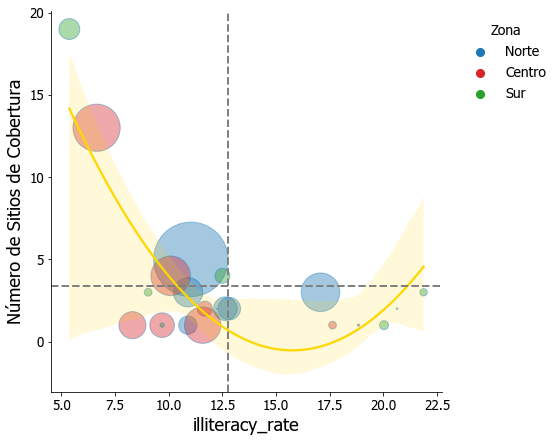

In [282]:
plt.figure(figsize=(7,7))

sns.regplot(data= final_df_canton, x='illiteracy_rate', y='Número de Sitios de Cobertura', marker='o',
    scatter_kws={'s': final_df_canton['Nro casas afectadas'], 'facecolors':final_df_canton['color_zona'], 'alpha': 0.4 },
    line_kws={"color": "gold"},order=2)

sns.despine(top=True, right=True, left=False, bottom=False)
gll = plt.scatter([],[], s=65, marker='o', color='tab:blue')
gl = plt.scatter([],[], s=65, marker='o', color='tab:red')
ga = plt.scatter([],[], s=65, marker='o', color='tab:green')

legend_x = 1.3
legend_y = 1

cl= ['tab:blue','tab:red','tab:green']
lab= ['Norte','Centro', 'Sur']

plt.legend((gll,gl,ga),('Norte', 'Centro', 'Sur'), scatterpoints=1,loc='best',ncol=1,
       fontsize=14, title="Zona", title_fontsize= 14,frameon=False,bbox_to_anchor=(legend_x, legend_y))

plt.axvline( final_df_canton.illiteracy_rate.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)
plt.axhline( final_df_canton['Número de Sitios de Cobertura'].mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)
plt.show()

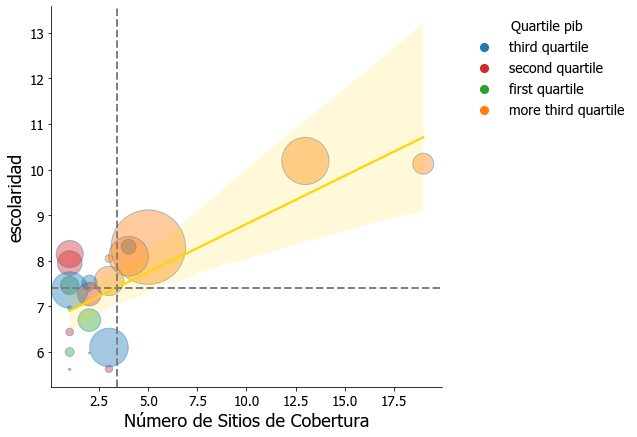

In [283]:
plt.figure(figsize=(7,7))

sns.regplot(data= final_df_canton, x='Número de Sitios de Cobertura', y='escolaridad', marker='o',
    scatter_kws={'s': final_df_canton['Nro casas afectadas'], 'facecolors':['tab:green' if v == 'first quartile' else 'tab:red' if v == 'second quartile' else 'tab:blue' if v == 'third quartile' else 'tab:orange' for v in final_df_canton.quartile ]
, 'alpha': 0.4 },
    line_kws={"color": "gold"},order=1)

sns.despine(top=True, right=True, left=False, bottom=False)
gll = plt.scatter([],[], s=65, marker='o', color='tab:blue')
gl = plt.scatter([],[], s=65, marker='o', color='tab:red')
ga = plt.scatter([],[], s=65, marker='o', color='tab:green')
gs = plt.scatter([],[], s=65, marker='o', color='tab:orange')

legend_x = 1.5
legend_y = 1

cl= ['tab:blue','tab:red','tab:green','tab:orange']
lab= ['third quartile','second quartile', 'first quartile','more third quartile']

plt.legend((gll,gl,ga,gs),('third quartile','second quartile', 'first quartile','more third quartile'), scatterpoints=1,loc='best',ncol=1,
       fontsize=14, title="Quartile pib", title_fontsize= 14,frameon=False,bbox_to_anchor=(legend_x, legend_y))

plt.axhline( final_df_canton.escolaridad.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)
plt.axvline( final_df_canton['Número de Sitios de Cobertura'].mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)
plt.show()

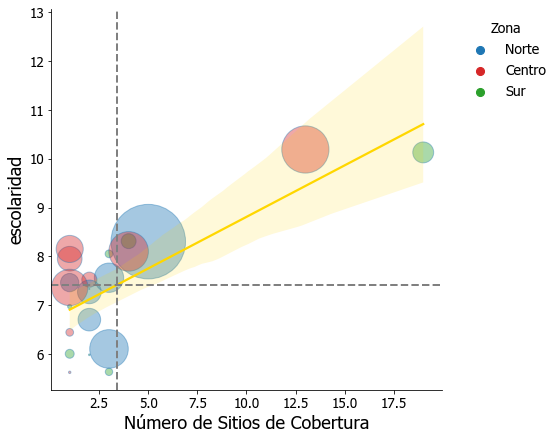

In [284]:
plt.figure(figsize=(7,7))

sns.regplot(data= final_df_canton, x='Número de Sitios de Cobertura', y='escolaridad', marker='o',
    scatter_kws={'s': final_df_canton['Nro casas afectadas'], 'facecolors':final_df_canton['color_zona'], 'alpha': 0.4 },
    line_kws={"color": "gold"},order=1)

sns.despine(top=True, right=True, left=False, bottom=False)
gll = plt.scatter([],[], s=65, marker='o', color='tab:blue')
gl = plt.scatter([],[], s=65, marker='o', color='tab:red')
ga = plt.scatter([],[], s=65, marker='o', color='tab:green')

legend_x = 1.3
legend_y = 1

cl= ['tab:blue','tab:red','tab:green']
lab= ['Norte','Centro', 'Sur']

plt.legend((gll,gl,ga),('Norte', 'Centro', 'Sur'), scatterpoints=1,loc='best',ncol=1,
       fontsize=14, title="Zona", title_fontsize= 14,frameon=False,bbox_to_anchor=(legend_x, legend_y))

plt.axhline( final_df_canton.escolaridad.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)
plt.axvline( final_df_canton['Número de Sitios de Cobertura'].mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)

plt.show()

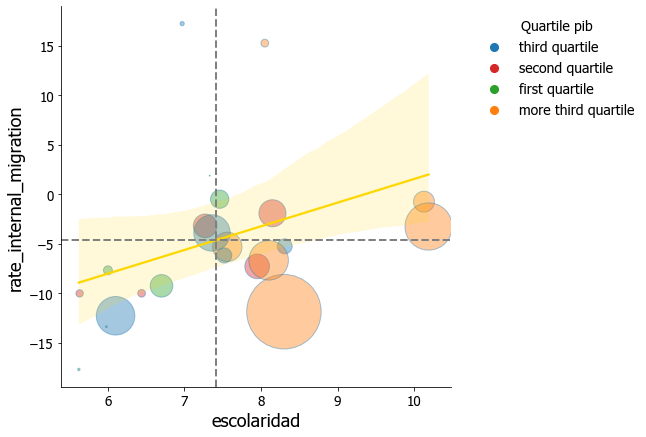

In [285]:
plt.figure(figsize=(7,7))

sns.regplot(data= final_df_canton, y='rate_internal_migration', x='escolaridad', marker='o',
    scatter_kws={'s': final_df_canton['Nro casas afectadas'], 'facecolors':['tab:green' if v == 'first quartile' else 'tab:red' if v == 'second quartile' else 'tab:blue' if v == 'third quartile' else 'tab:orange' for v in final_df_canton.quartile ]
, 'alpha': 0.4 },
    line_kws={"color": "gold"},order=1)

sns.despine(top=True, right=True, left=False, bottom=False)
gll = plt.scatter([],[], s=65, marker='o', color='tab:blue')
gl = plt.scatter([],[], s=65, marker='o', color='tab:red')
ga = plt.scatter([],[], s=65, marker='o', color='tab:green')
gs = plt.scatter([],[], s=65, marker='o', color='tab:orange')

legend_x = 1.5
legend_y = 1

cl= ['tab:blue','tab:red','tab:green','tab:orange']
lab= ['third quartile','second quartile', 'first quartile','more third quartile']

plt.legend((gll,gl,ga,gs),('third quartile','second quartile', 'first quartile','more third quartile'), scatterpoints=1,loc='best',ncol=1,
       fontsize=14, title="Quartile pib", title_fontsize= 14,frameon=False,bbox_to_anchor=(legend_x, legend_y))

plt.axvline( final_df_canton.escolaridad.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)
plt.axhline( final_df_canton.rate_internal_migration.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)

plt.show()

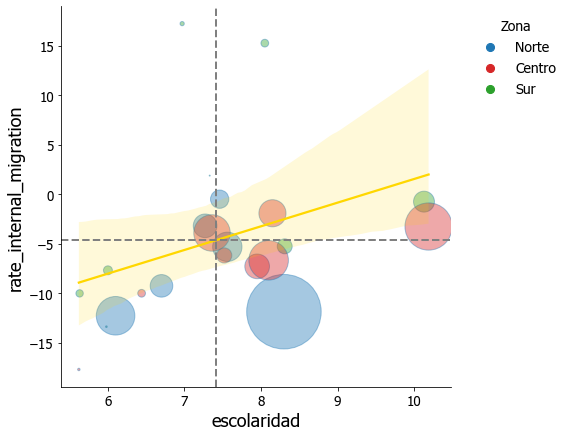

In [286]:
plt.figure(figsize=(7,7))

sns.regplot(data= final_df_canton, y='rate_internal_migration', x='escolaridad', marker='o',
    scatter_kws={'s': final_df_canton['Nro casas afectadas'], 'facecolors':final_df_canton['color_zona'], 'alpha': 0.4 },
    line_kws={"color": "gold"},order=1)

sns.despine(top=True, right=True, left=False, bottom=False)
gll = plt.scatter([],[], s=65, marker='o', color='tab:blue')
gl = plt.scatter([],[], s=65, marker='o', color='tab:red')
ga = plt.scatter([],[], s=65, marker='o', color='tab:green')

legend_x = 1.3
legend_y = 1

cl= ['tab:blue','tab:red','tab:green']
lab= ['Norte','Centro', 'Sur']

plt.legend((gll,gl,ga),('Norte', 'Centro', 'Sur'), scatterpoints=1,loc='best',ncol=1,
       fontsize=14, title="Zona", title_fontsize= 14,frameon=False,bbox_to_anchor=(legend_x, legend_y))
plt.axvline( final_df_canton.escolaridad.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)
plt.axhline( final_df_canton.rate_internal_migration.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)

plt.show()

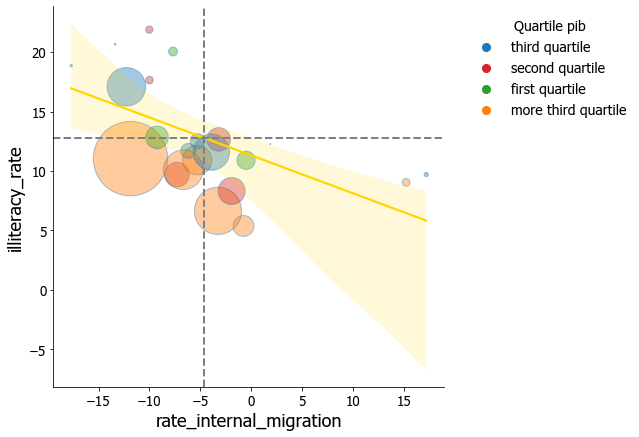

In [287]:
plt.figure(figsize=(7,7))

sns.regplot(data= final_df_canton, y='illiteracy_rate', x='rate_internal_migration', marker='o',
    scatter_kws={'s': final_df_canton['Nro casas afectadas'], 'facecolors':['tab:green' if v == 'first quartile' else 'tab:red' if v == 'second quartile' else 'tab:blue' if v == 'third quartile' else 'tab:orange' for v in final_df_canton.quartile ]
, 'alpha': 0.4 },
    line_kws={"color": "gold"},order=1)

sns.despine(top=True, right=True, left=False, bottom=False)
gll = plt.scatter([],[], s=65, marker='o', color='tab:blue')
gl = plt.scatter([],[], s=65, marker='o', color='tab:red')
ga = plt.scatter([],[], s=65, marker='o', color='tab:green')
gs = plt.scatter([],[], s=65, marker='o', color='tab:orange')

legend_x = 1.5
legend_y = 1

cl= ['tab:blue','tab:red','tab:green','tab:orange']
lab= ['third quartile','second quartile', 'first quartile','more third quartile']

plt.legend((gll,gl,ga,gs),('third quartile','second quartile', 'first quartile','more third quartile'), scatterpoints=1,loc='best',ncol=1,
       fontsize=14, title="Quartile pib", title_fontsize= 14,frameon=False,bbox_to_anchor=(legend_x, legend_y))

plt.axvline( final_df_canton.rate_internal_migration.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)
plt.axhline( final_df_canton.illiteracy_rate.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)

plt.show()

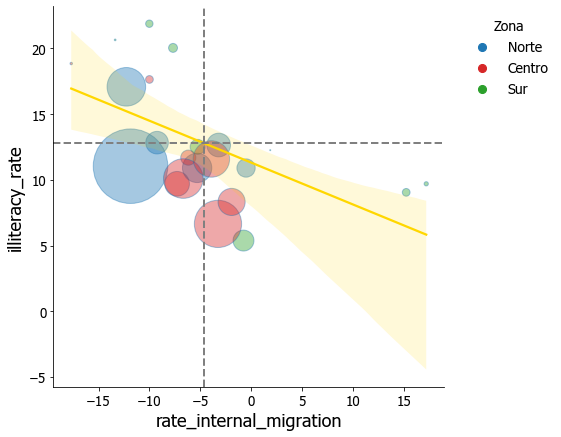

In [288]:
plt.figure(figsize=(7,7))

sns.regplot(data= final_df_canton, y='illiteracy_rate', x='rate_internal_migration', marker='o',
    scatter_kws={'s': final_df_canton['Nro casas afectadas'], 'facecolors':final_df_canton['color_zona'], 'alpha': 0.4 },
    line_kws={"color": "gold"},order=1)

sns.despine(top=True, right=True, left=False, bottom=False)
gll = plt.scatter([],[], s=65, marker='o', color='tab:blue')
gl = plt.scatter([],[], s=65, marker='o', color='tab:red')
ga = plt.scatter([],[], s=65, marker='o', color='tab:green')

legend_x = 1.3
legend_y = 1

cl= ['tab:blue','tab:red','tab:green']
lab= ['Norte','Centro', 'Sur']

plt.legend((gll,gl,ga),('Norte', 'Centro', 'Sur'), scatterpoints=1,loc='best',ncol=1,
       fontsize=14, title="Zona", title_fontsize= 14,frameon=False,bbox_to_anchor=(legend_x, legend_y))

plt.axvline( final_df_canton.rate_internal_migration.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)
plt.axhline( final_df_canton.illiteracy_rate.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)

plt.show()

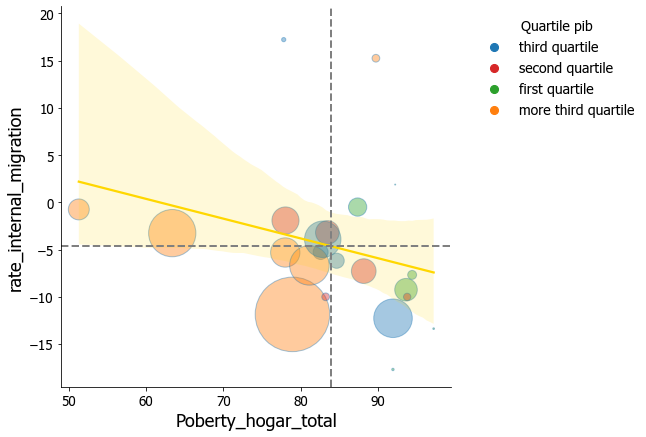

In [289]:
plt.figure(figsize=(7,7))

sns.regplot(data= final_df_canton, y='rate_internal_migration', x='Poberty_hogar_total', marker='o',
    scatter_kws={'s': final_df_canton['Nro casas afectadas'], 'facecolors':['tab:green' if v == 'first quartile' else 'tab:red' if v == 'second quartile' else 'tab:blue' if v == 'third quartile' else 'tab:orange' for v in final_df_canton.quartile ]
, 'alpha': 0.4 },
    line_kws={"color": "gold"},order=1)

sns.despine(top=True, right=True, left=False, bottom=False)
gll = plt.scatter([],[], s=65, marker='o', color='tab:blue')
gl = plt.scatter([],[], s=65, marker='o', color='tab:red')
ga = plt.scatter([],[], s=65, marker='o', color='tab:green')
gs = plt.scatter([],[], s=65, marker='o', color='tab:orange')

legend_x = 1.5
legend_y = 1

cl= ['tab:blue','tab:red','tab:green','tab:orange']
lab= ['third quartile','second quartile', 'first quartile','more third quartile']

plt.legend((gll,gl,ga,gs),('third quartile','second quartile', 'first quartile','more third quartile'), scatterpoints=1,loc='best',ncol=1,
       fontsize=14, title="Quartile pib", title_fontsize= 14,frameon=False,bbox_to_anchor=(legend_x, legend_y))

plt.axvline( final_df_canton.Poberty_hogar_total.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)
plt.axhline( final_df_canton.rate_internal_migration.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)

plt.show()


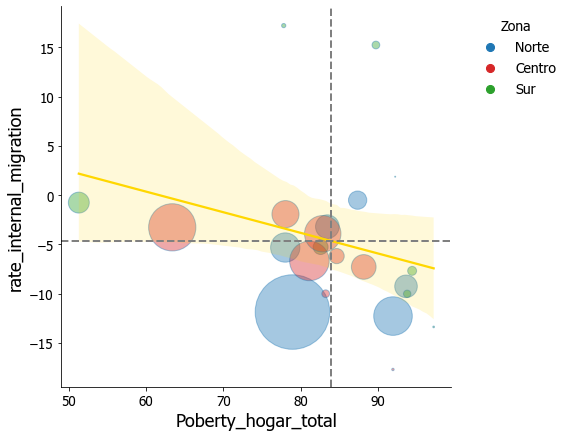

In [290]:
plt.figure(figsize=(7,7))

sns.regplot(data= final_df_canton, y='rate_internal_migration', x='Poberty_hogar_total', marker='o',
    scatter_kws={'s': final_df_canton['Nro casas afectadas'], 'facecolors':final_df_canton['color_zona'], 'alpha': 0.4 },
    line_kws={"color": "gold"},order=1)

sns.despine(top=True, right=True, left=False, bottom=False)
gll = plt.scatter([],[], s=65, marker='o', color='tab:blue')
gl = plt.scatter([],[], s=65, marker='o', color='tab:red')
ga = plt.scatter([],[], s=65, marker='o', color='tab:green')

legend_x = 1.3
legend_y = 1

cl= ['tab:blue','tab:red','tab:green']
lab= ['Norte','Centro', 'Sur']

plt.legend((gll,gl,ga),('Norte', 'Centro', 'Sur'), scatterpoints=1,loc='best',ncol=1,
       fontsize=14, title="Zona", title_fontsize= 14,frameon=False,bbox_to_anchor=(legend_x, legend_y))

plt.axvline( final_df_canton.Poberty_hogar_total.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)
plt.axhline( final_df_canton.rate_internal_migration.mean() ,c='grey', lw=2,linestyle ='--',linewidth=15)
plt.show()

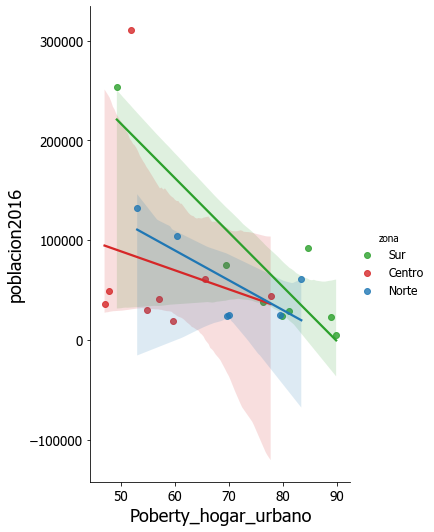

In [291]:
plt.rcParams ['font.family'] = 'Tahoma'

sns.lmplot(x='Poberty_hogar_urbano', y='poblacion2016',data= final_df_canton, hue='zona', fit_reg=True,
          height=7.5 , aspect=0.7, order=1,
          palette=
                dict({'Sur':'tab:green',
                  'Centro':'tab:red',
                  'Norte': 'tab:blue'}))

plt.show()

In [292]:
final_df_canton.columns

Index(['index', 'Median_res', 'Median_con', 'Número de Centros de Salud',
       'Número de Sitios de Cobertura', 'Nro.Poli.Com', 'internal_migartion',
       'rate_internal_migration', 'Poberty_hogar_total',
       'Poberty_hogar_urbano', 'Poberty_hogar_rural', 'Poverty_pers_total',
       'Poverty_pers_urbano', 'Poverty_pers_rural', 'illiteracy_rate',
       'escolaridad', 'severidad', 'Nro casas afectadas', 'zona', 'color_zona',
       'distance', 'poblacion2016', 'pib', 'quartile'],
      dtype='object')

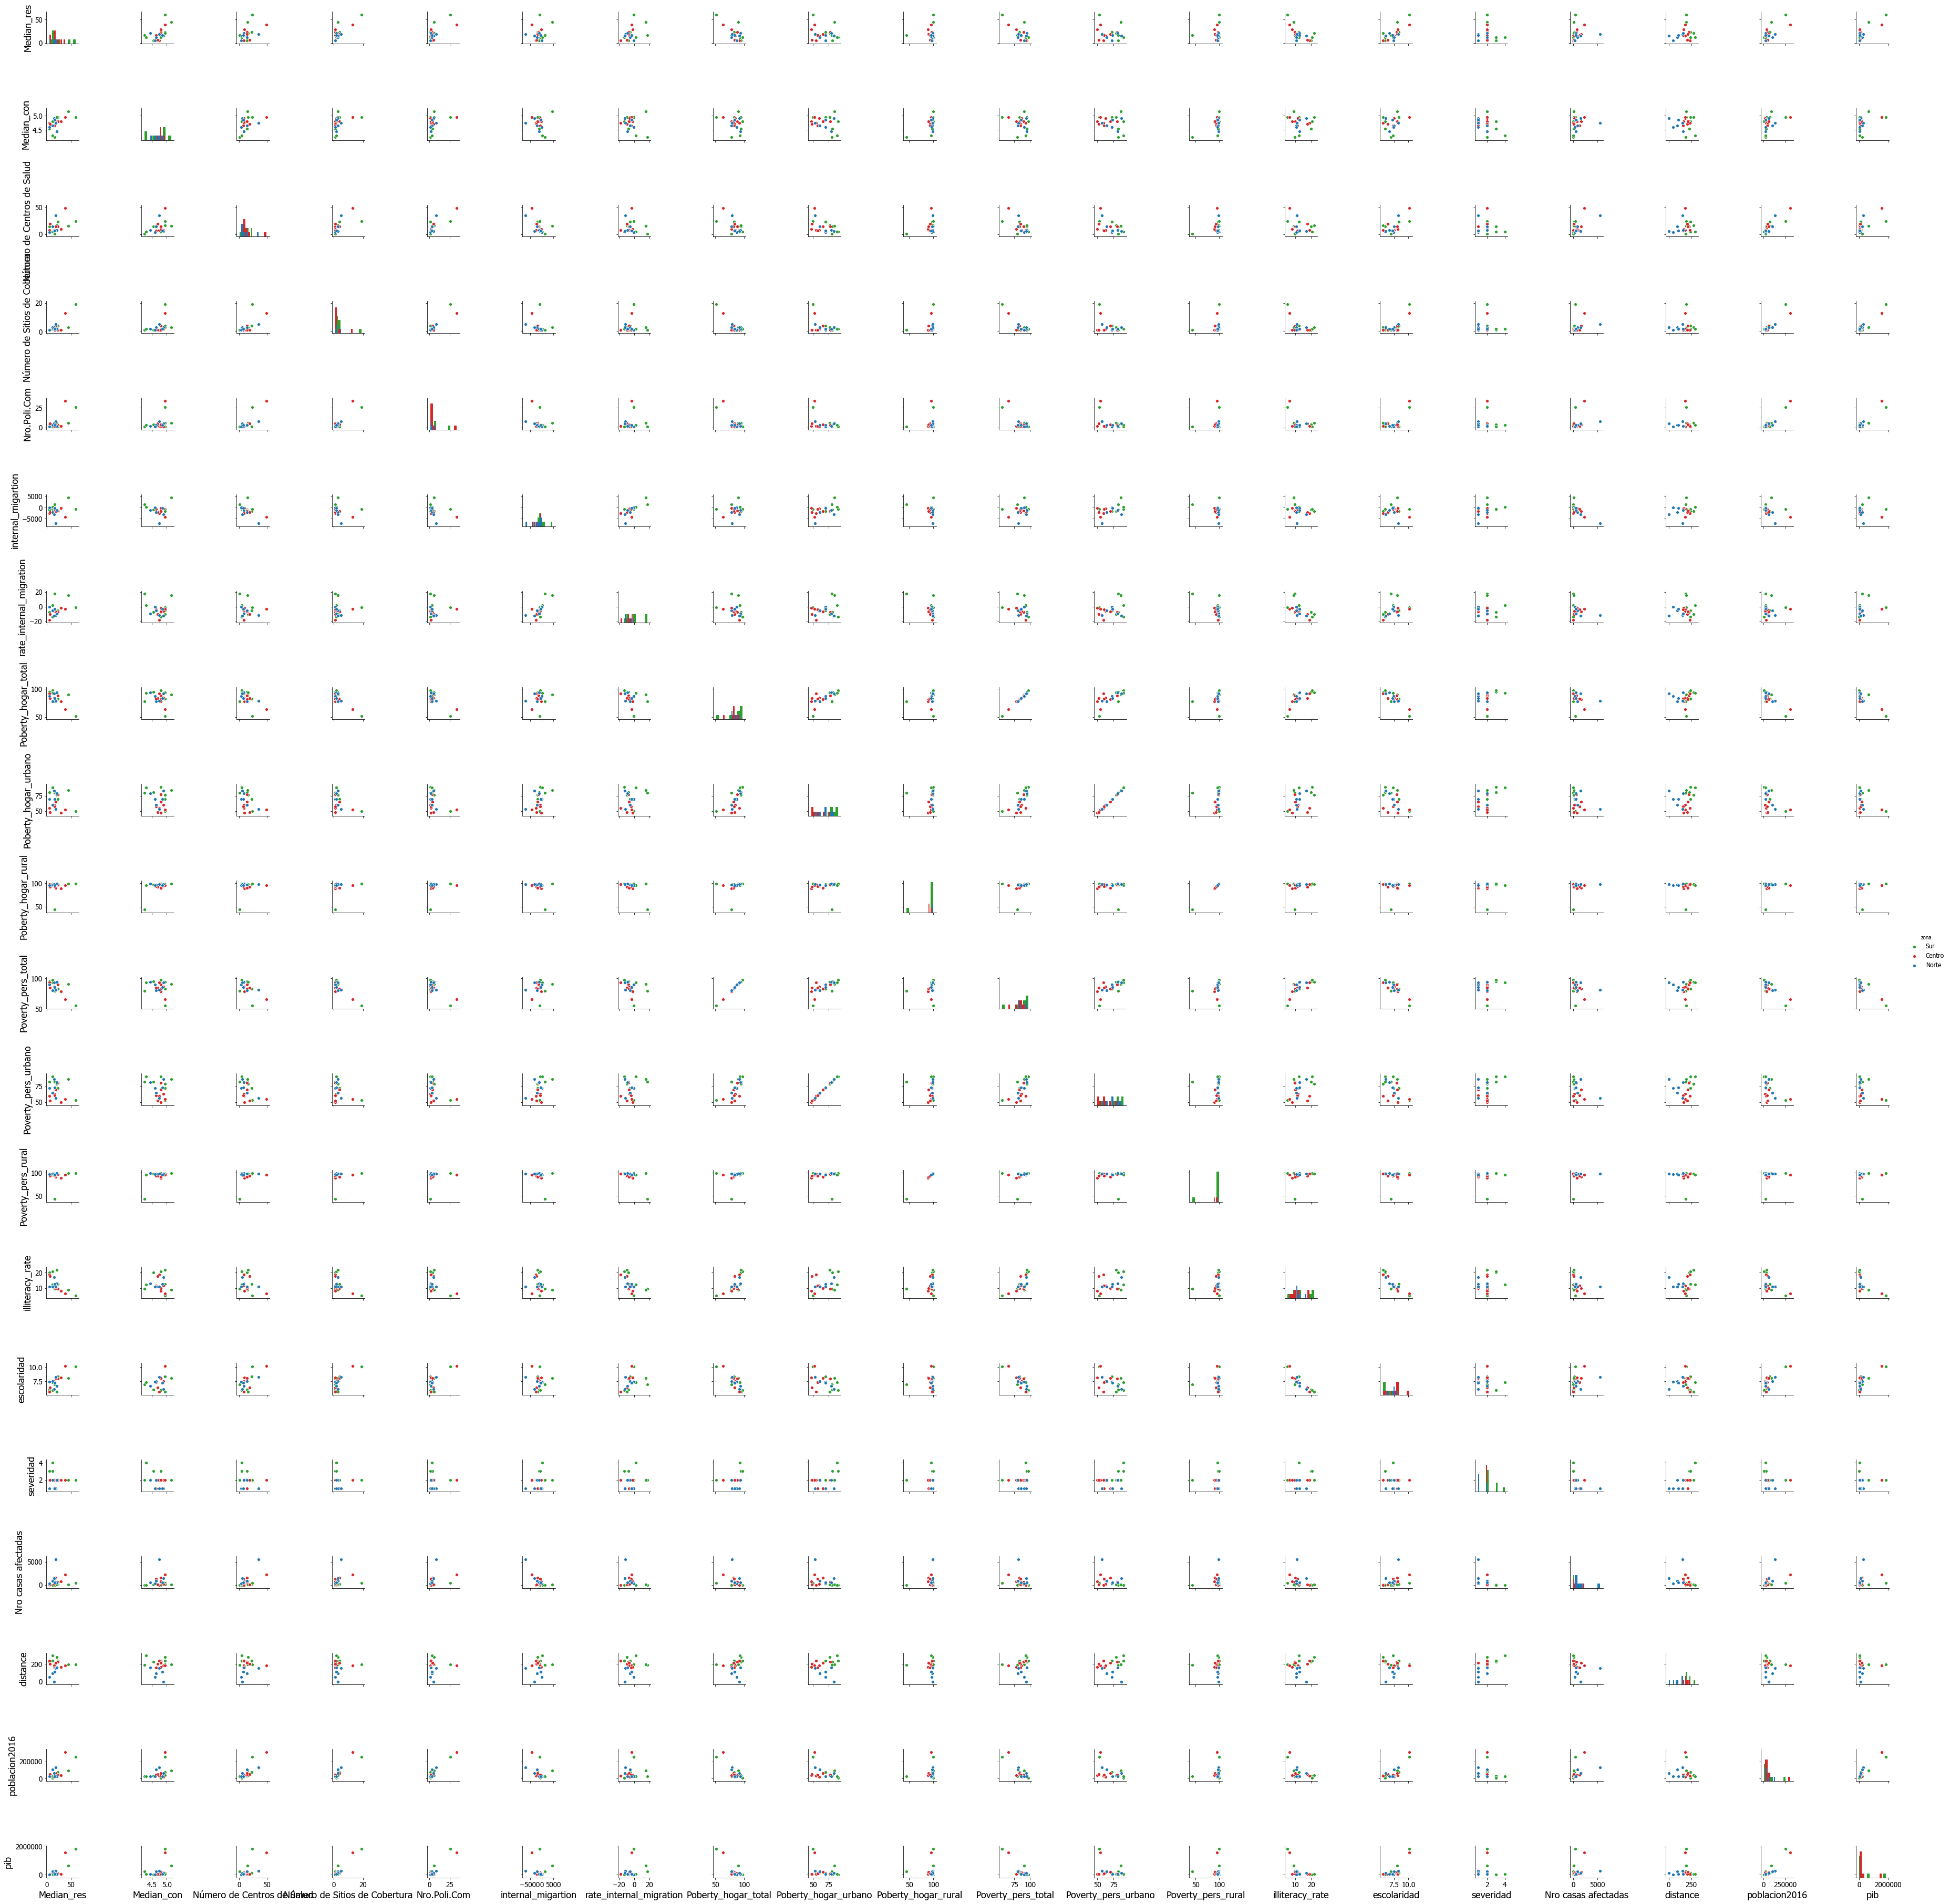

In [67]:


sns.pairplot(final_df_canton[ final_df_canton.columns[~ final_df_canton.columns.isin(['index','color_zona'])]],
            diag_kind="hist",hue='zona',
             palette=
                dict({'Sur':'tab:green',
                  'Centro':'tab:red',
                  'Norte': 'tab:blue'}))
plt.tick_params(axis='both', which='major', pad=13,labelsize=14)


plt.show()

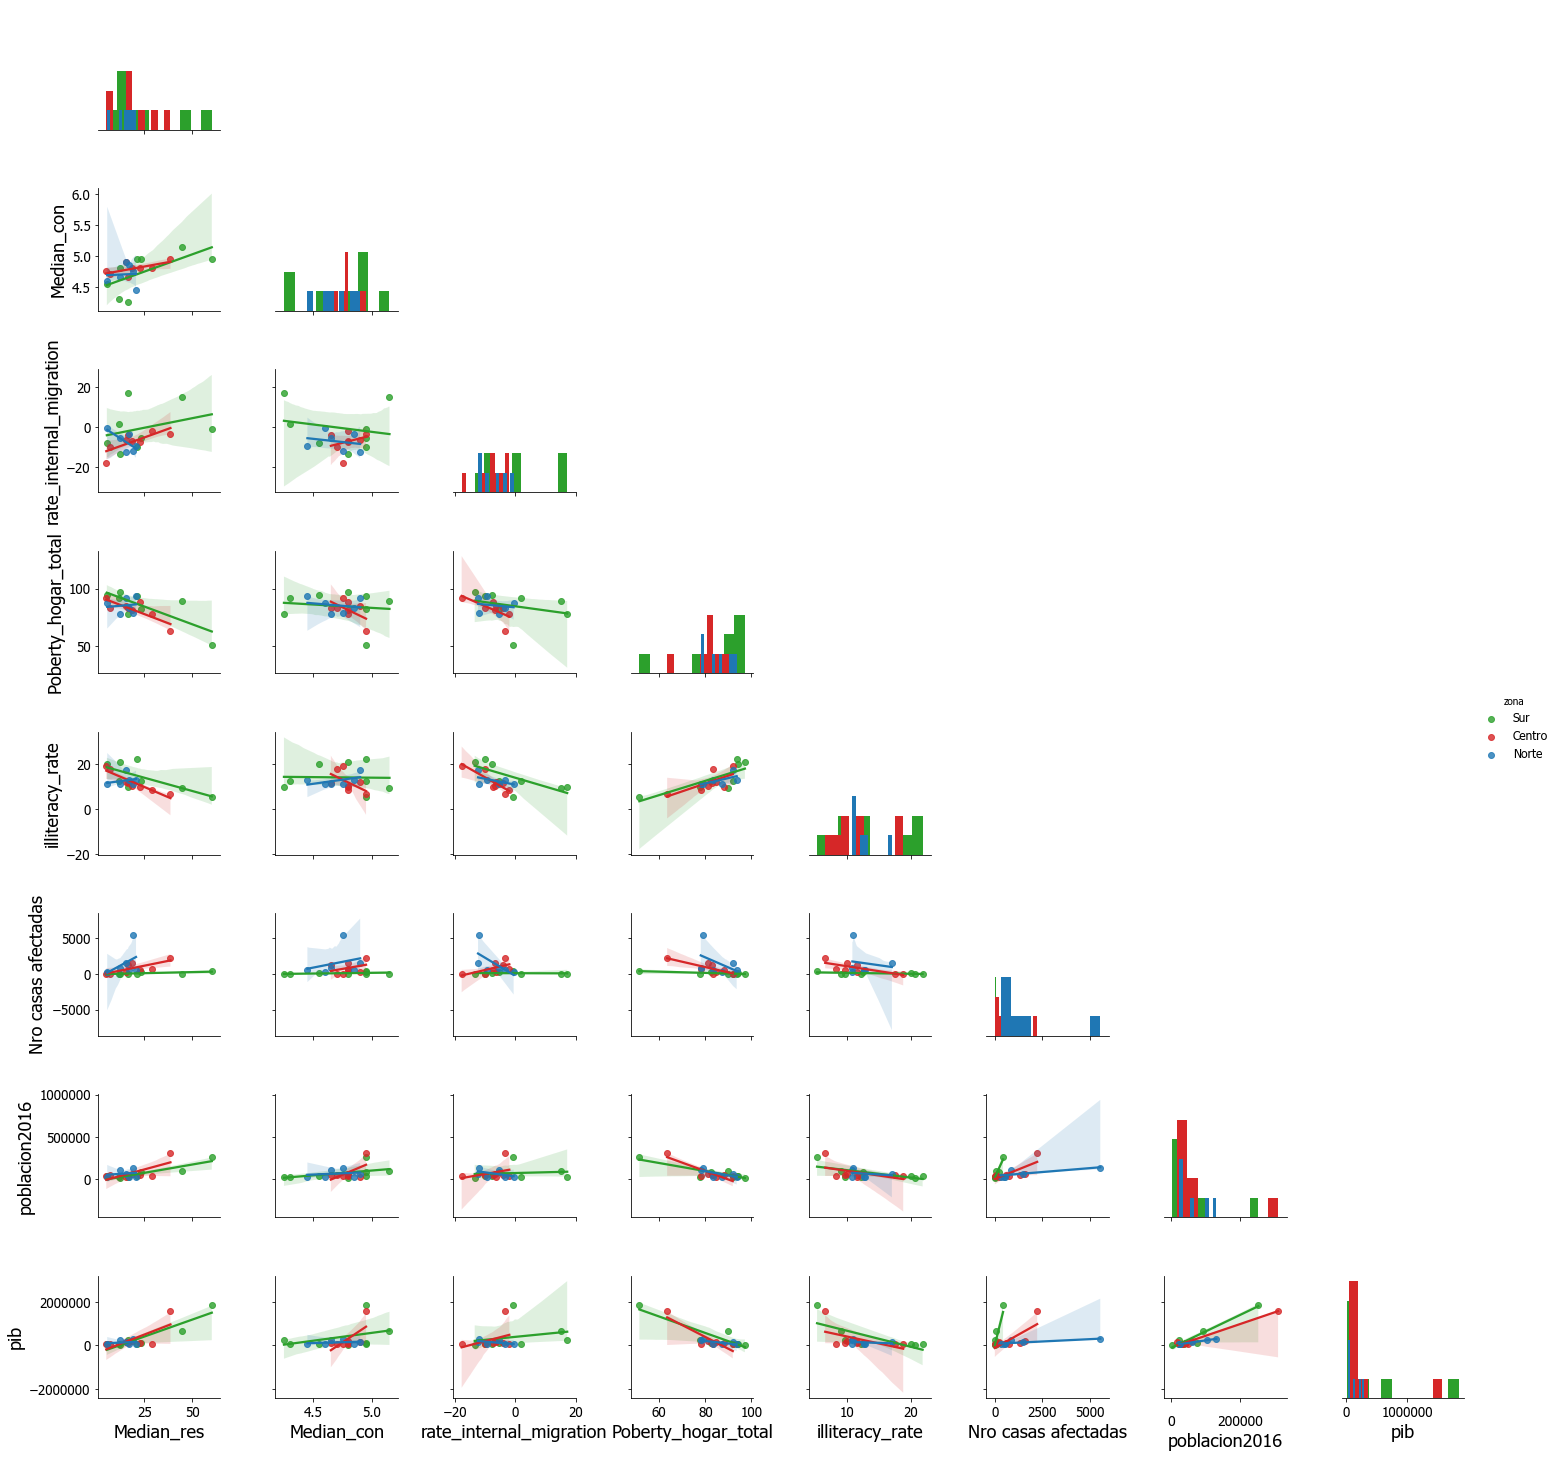

In [71]:
sns.pairplot(final_df_canton.loc[:,['Median_res','Median_con','rate_internal_migration','Poberty_hogar_total',
                       'illiteracy_rate','Nro casas afectadas','zona','poblacion2016','pib']],
              diag_kind="hist",hue='zona',
             palette=
                dict({'Sur':'tab:green',
                  'Centro':'tab:red',
                  'Norte': 'tab:blue'}), corner=True,kind="reg" ) 

plt.tick_params(axis='both', which='major', pad=13,labelsize=14)


plt.show()

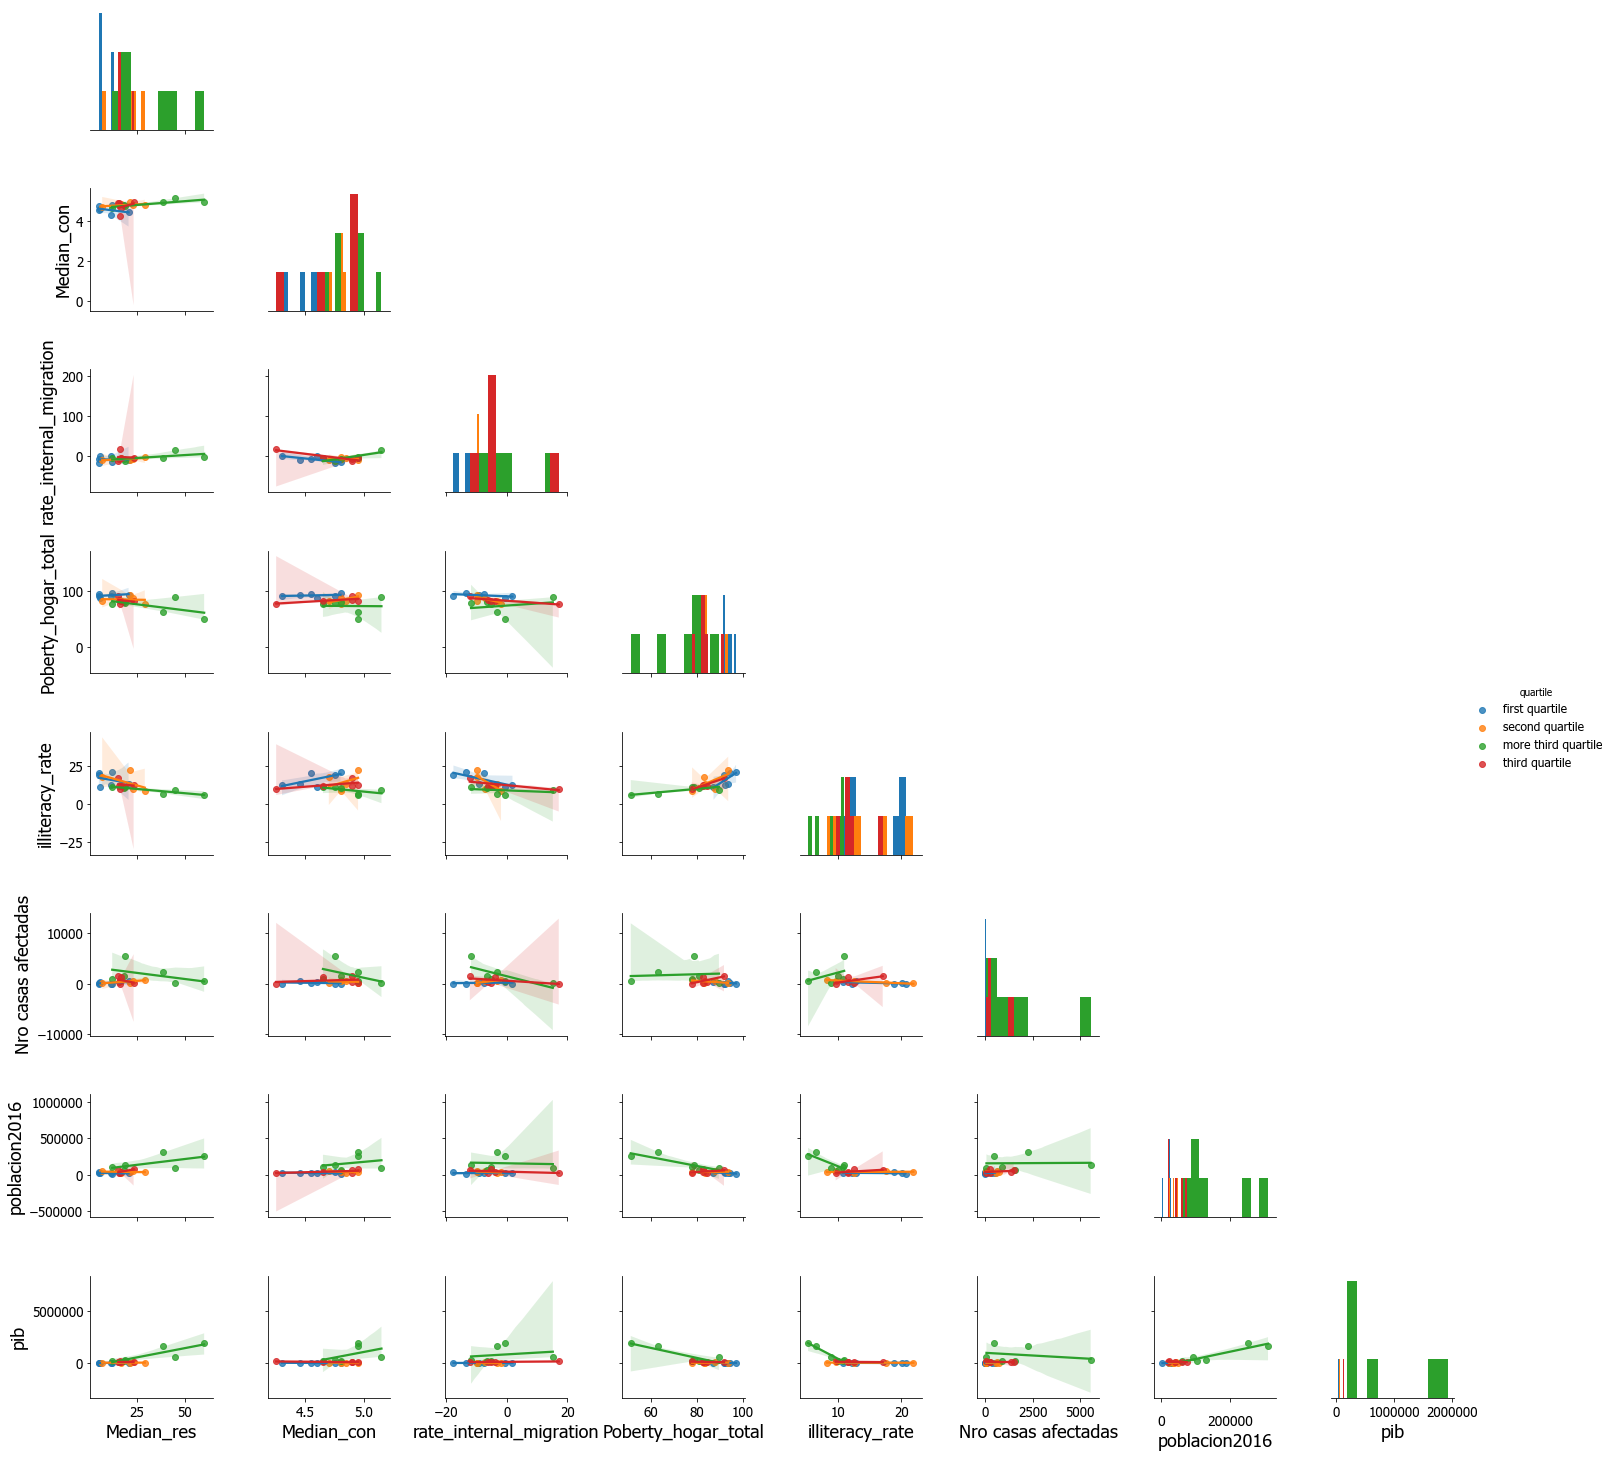

In [293]:
# ,'rate_internal_migration','Poberty_hogar_total',
  #                     'illiteracy_rate','Nro casas afectadas','zona','poblacion2016'
sns.pairplot(final_df_canton.loc[:,['Median_res','Median_con','rate_internal_migration','Poberty_hogar_total',
    'illiteracy_rate','Nro casas afectadas','zona','poblacion2016','pib','quartile']],
              diag_kind="hist",hue='quartile', corner=True,kind="reg" ) 

plt.tick_params(axis='both', which='major', pad=13,labelsize=14)


plt.show()

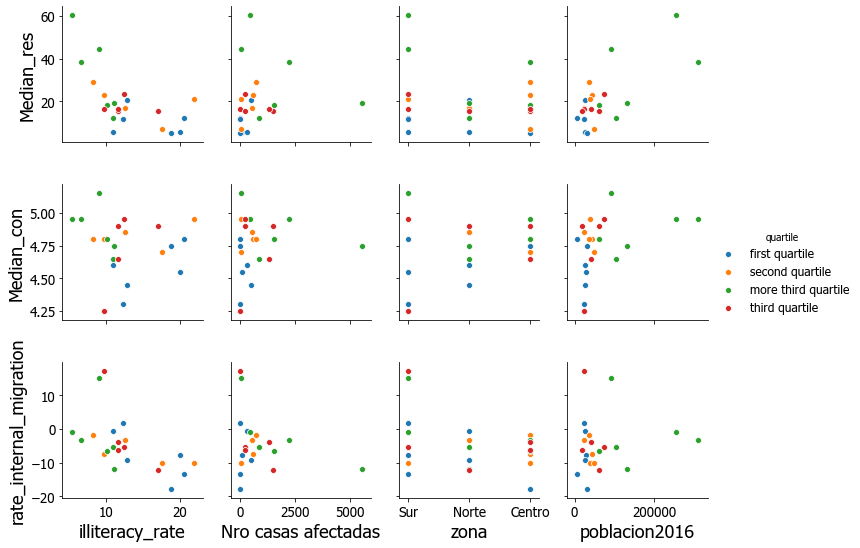

In [294]:
sns.pairplot(data= final_df_canton.loc[:,['Median_res','Median_con','rate_internal_migration','Poberty_hogar_total',
                       'illiteracy_rate','Nro casas afectadas','zona','poblacion2016','pib','quartile']],
                  y_vars=['Median_res','Median_con','rate_internal_migration'],
                  x_vars=['illiteracy_rate','Nro casas afectadas','zona','poblacion2016'], hue='quartile')

plt.show()

In [69]:
# analissis de movilidad (idea)
# cliente - antena a la que se conecta comunmente una persona
# canton cliente con canbton  parroquia



In [125]:
final_df_canton.quartile.value_counts()

first quartile         6
more third quartile    6
third quartile         5
second quartile        5
Name: quartile, dtype: int64

$$
f\left( x \right) = \;\frac{{2\left( {x + 4} \right)\left( {x - 4} \right)}}{{\left( {x + 4} \right)\left( {x + 1} \right)}}
$$


--- hola mundo

How to center the title in R Markdown

<p style="text-align: center;">Centered text</p>

<div align="center">The derogatory term “scrub” means several different things. One definition is someone (especially a game player) who is not good at something (especially a game). By this definition, we all start out as scrubs, and there is certainly no shame in that. I mean the term differently, though. A scrub is a player who is handicapped by self-imposed rules that the game knows nothing about. A scrub does not play to win.</div>


